# Aims
---

We want to demonstrate:

LvR: features which are different at all time (DE testing)

L: features which are associated and increase over time
L: features which are associated and decrease over time

R: features which are associated and increase over time
R: features which are associated and decrease over time

In [1]:
jctk_dir="/lustre/scratch126/cellgen/team205/jc48/jupyter/jctk"

In [2]:
import importlib.util
import sys
import types
import inspect

# ensure the `jctk_dir` path is already specified

def import_and_list_functions(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    
    function_names = []
    for name, obj in inspect.getmembers(module):
        if isinstance(obj, types.FunctionType):
            function_names.append(name)
    
    print(f"Imported from {module_name}: {function_names}")
    
    return module  # Return the module object

# Import and list functions, then assign to a variable
plot = import_and_list_functions("plot", f"{jctk_dir}/jctk/plot.py")
utils = import_and_list_functions("utils", f"{jctk_dir}/jctk/utils.py")
api = import_and_list_functions("api", f"{jctk_dir}/jctk/api.py")

Imported from plot: ['GO_plot', 'highlight_all_categories', 'highlight_categories', 'normalized_stacked_bar_chart']
Imported from utils: ['check_update', 'compute_median_count', 'downsample_adata_proportionately', 'downsample_adata_randomly', 'lognorm_to_counts_with_progress', 'rank_genes_vs_nearest', 'read_gsheet', 'remove_small_batches', 'rename_adata_var_index', 'rules_based_annotation', 'shapiro', 'test_normality']
Imported from api: ['add_genomic_coordinates', 'getClinVargenes', 'getHGNCgroup', 'getHGNCgroup_dict']


In [3]:
import anndata

def split_adata_by_modality(adata, modality_column, modality_values):
    """
    Splits an AnnData object into multiple AnnData objects based on a given modality column.
    
    Parameters:
        adata (anndata.AnnData): The original AnnData object.
        modality_column (str): The name of the column in adata.var that contains the modality information.
        modality_values (list): List of unique modalities that you want to split the adata into.
        
    Returns:
        dict: A dictionary where the keys are the modality names and the values are the new AnnData objects.
    """
    # Initialize an empty dictionary to hold the new AnnData objects
    splitted_adatas = {}
    
    # Loop through each modality value to create a new AnnData object
    for modality in modality_values:
        # Get the indices of the features belonging to the current modality
        feature_idx = adata.var[modality_column] == modality
        
        # Create a new AnnData object with only the features belonging to the current modality
        new_adata = anndata.AnnData(X=adata[:, feature_idx].X,
                                    obs=adata.obs,
                                    var=adata.var.loc[feature_idx],
                                    obsm=adata.obsm,
                                    uns=adata.uns)
        
        # Add the new AnnData object to the dictionary
        splitted_adatas[modality] = new_adata
    
    return splitted_adatas

In [4]:
path_to_auc_gene="/nfs/team205/heart/pyscenic/plus/AUCscore/foetal_aCM_n570_eRegulon_AUC_gene.csv"
path_to_auc_region="/nfs/team205/heart/pyscenic/plus/AUCscore/foetal_aCM_n570_eRegulon_AUC_region.csv"

paired_adata_with_time_path = "/lustre/scratch126/cellgen/team205/heart/objects/fetal/RNA/aCMs_WholeSample_paired_with_time.h5ad"

temporal_ordering='age_days_smoothed_once'

In [5]:
import scanpy as sc
import pandas as pd

# Read in data with all features

In [6]:
adata=sc.read(paired_adata_with_time_path)
adata

AnnData object with n_obs × n_vars = 5664 × 544641
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', 'age_days', 'age_days_smoothed_once', 'age_days_normalized', 'age_days_normalized_smoothed_once', 'age_days_smoothed_iteratively', 'age_days_normalized_smoothed_iteratively', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id'
    uns: 'donor_colors', 'fine_grain_colors', 'graph', 'milesto

In [7]:
adata.X.data[:5]

array([2., 1., 1., 1., 1.], dtype=float32)

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


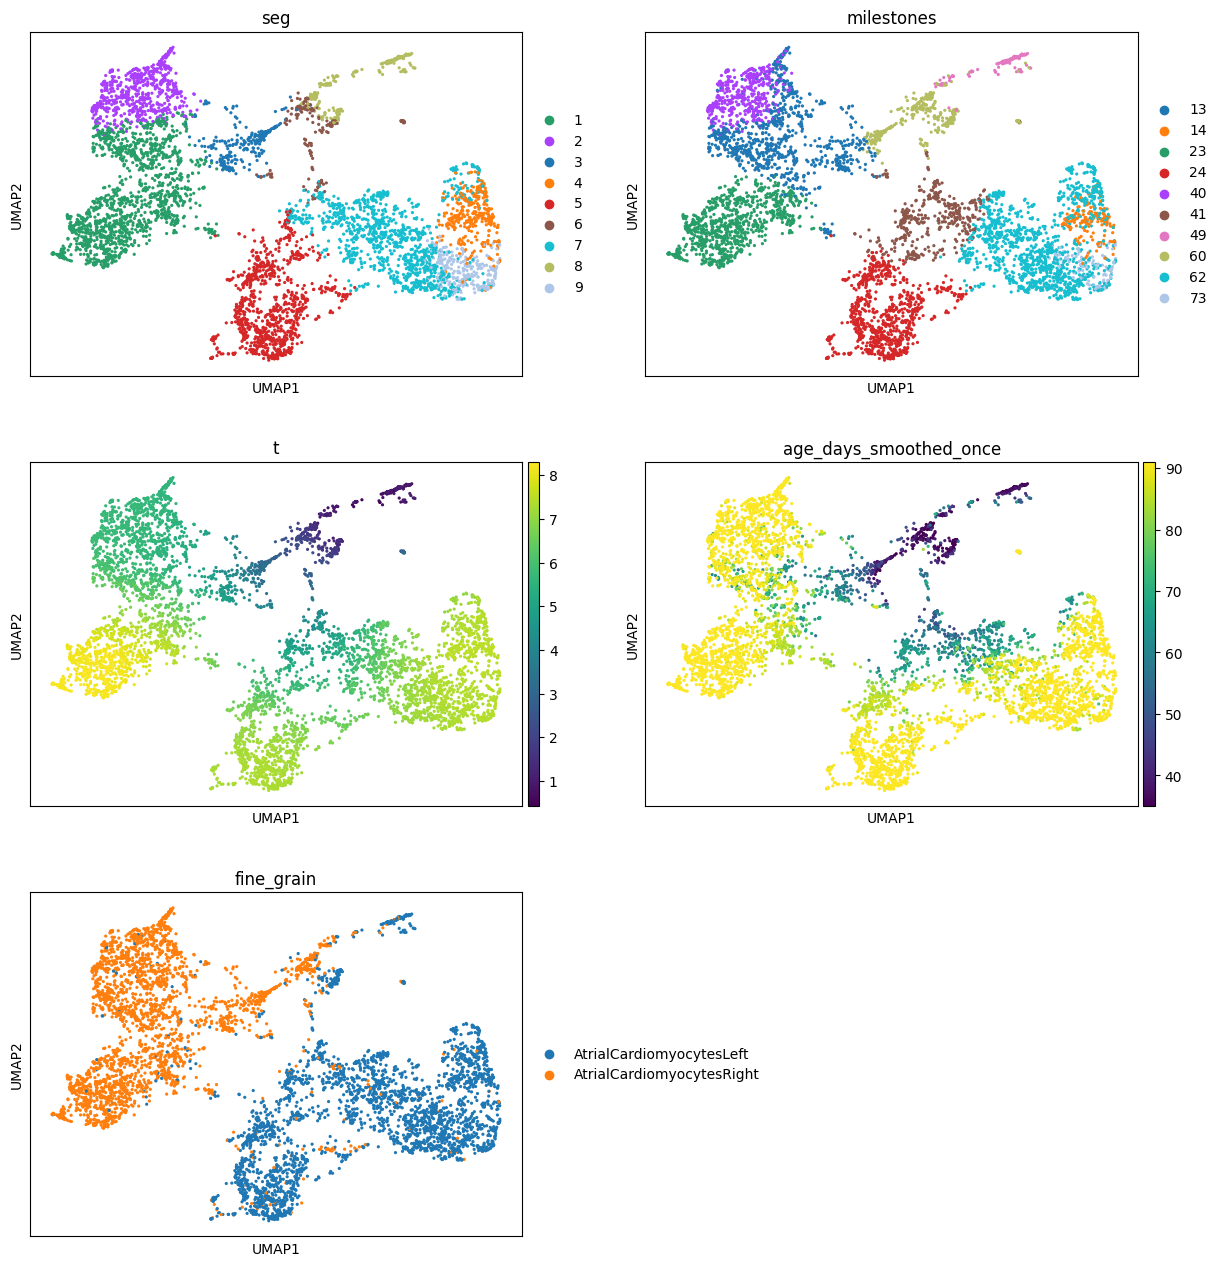

In [8]:
sc.pl.umap(adata,color=["seg","milestones","t",temporal_ordering,"fine_grain"],ncols=2)

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


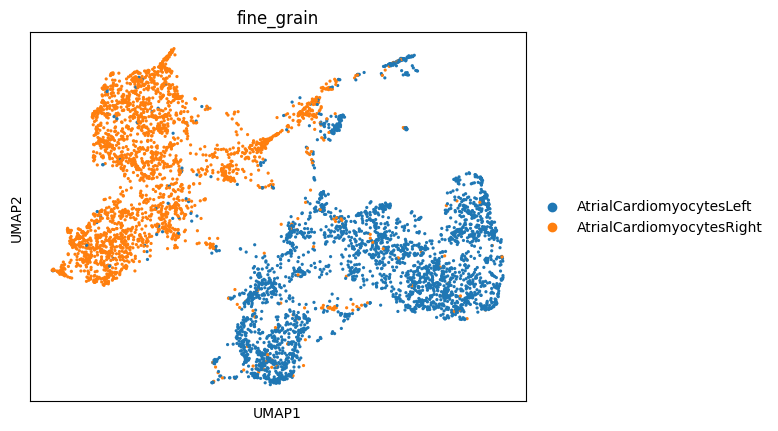

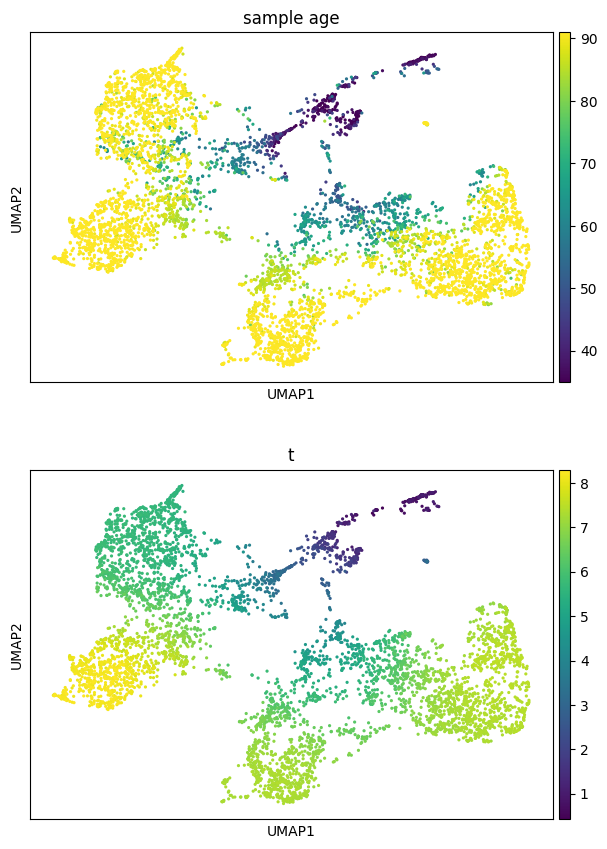

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


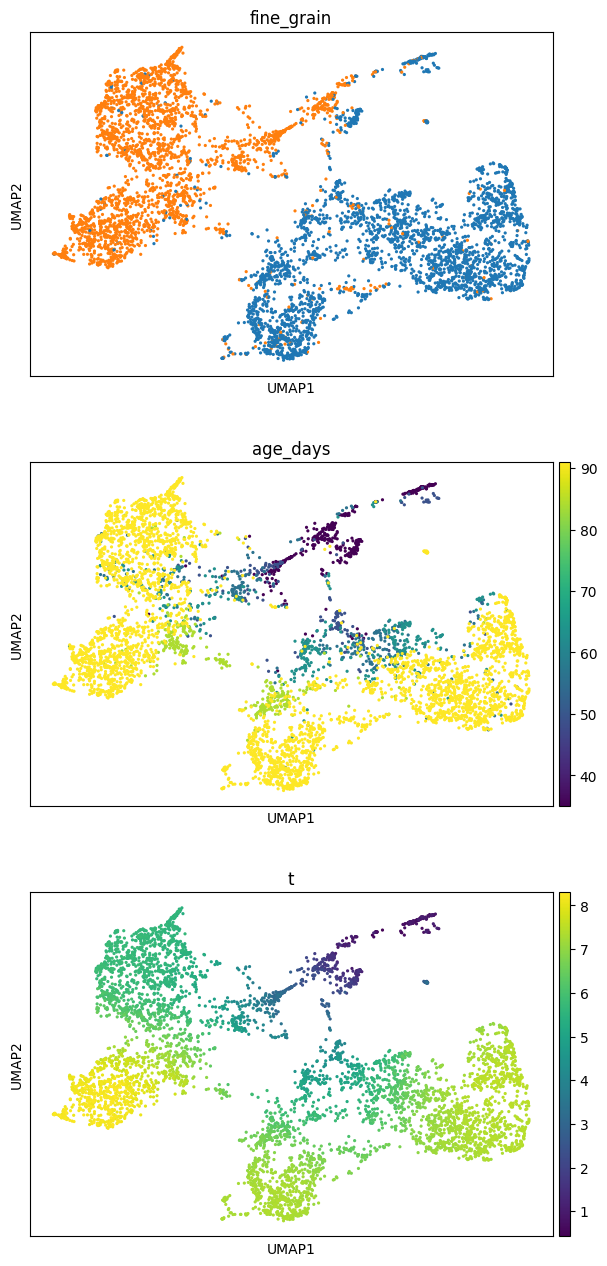

In [9]:
sc.pl.umap(adata,color=["fine_grain"],ncols=1)
sc.pl.umap(adata,color=[temporal_ordering,"t"],ncols=1,title="sample age")

sc.pl.umap(adata,color=["fine_grain","age_days","t"],ncols=1, legend_loc=None)

# Split into GEX and ATAC objects

In [10]:
adata.shape

(5664, 544641)

In [11]:
modality_column = "modality"
modality_values = ["Gene Expression", "Peaks"]
splitted_adatas = split_adata_by_modality(adata, modality_column, modality_values)

adata_gex = splitted_adatas["Gene Expression"]
print(adata_gex)

adata_atac = splitted_adatas["Peaks"]
print(adata_atac)

AnnData object with n_obs × n_vars = 5664 × 36601
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', 'age_days', 'age_days_smoothed_once', 'age_days_normalized', 'age_days_normalized_smoothed_once', 'age_days_smoothed_iteratively', 'age_days_normalized_smoothed_iteratively', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id'
    uns: 'donor_colors', 'fine_grain_colors', 'graph', 'mileston

In [12]:
adata_gex.X.data[:10]

array([2., 1., 1., 1., 1., 1., 8., 2., 1., 1.], dtype=float32)

In [13]:
adata_atac.X.data[:10]

array([2., 1., 1., 1., 1., 2., 2., 1., 1., 2.], dtype=float32)

In [14]:
adata_gex.layers["counts"]=adata_gex.X.copy()
adata_atac.layers["counts"]=adata_atac.X.copy()

sc.pp.normalize_total(adata_gex, target_sum=1e4)
sc.pp.normalize_total(adata_atac, target_sum=1e4)

sc.pp.log1p(adata_gex)
sc.pp.log1p(adata_atac)

In [15]:
adata_gex.X.data[:10]

array([1.559231 , 1.0569503, 1.0569503, 1.0569503, 1.0569503, 1.0569503,
       2.7738788, 1.559231 , 1.0569503, 1.0569503], dtype=float32)

In [16]:
adata_atac.X.data[:10]

array([0.6963374 , 0.40759304, 0.40759304, 0.40759304, 0.40759304,
       0.6963374 , 0.6963374 , 0.40759304, 0.40759304, 0.6963374 ],
      dtype=float32)

# Make AUC objects

In [17]:
# read in regulon scores
auc_gene = pd.read_csv(path_to_auc_gene, index_col=0)
print(auc_gene.shape)
auc_region = pd.read_csv(path_to_auc_region, index_col=0)
print(auc_region.shape)

(17302, 278)
(12964, 278)


In [18]:
# make regulon adata, AUC gene
# AUC Gene
# create anndata
adata_aucg = anndata.AnnData(
    X=auc_gene.loc[adata_gex.obs_names],
    obs=adata_gex.obs,
    var=pd.DataFrame(auc_gene.columns).set_index(0),
    obsm=adata_gex.obsm,
    uns= adata_gex.uns
)
# modify varnames
adata_aucg.var_names = [x.split('_(')[0] for x in adata_aucg.var_names]
print(adata_aucg.shape)

# AUC Region
# create anndata
adata_aucr = anndata.AnnData(
    X=auc_region.loc[adata_gex.obs_names],
    obs=adata_gex.obs,
    var=pd.DataFrame(auc_region.columns).set_index(0),
    obsm=adata_gex.obsm
)
# modify varnames
adata_aucr.var_names = [x.split('_(')[0] for x in adata_aucr.var_names]
print(adata_aucr.shape)

(5664, 278)
(5664, 278)


# Find features which are Left or Right specific

In [19]:
LEFT_or_RIGHT_features={}

In [20]:
log2fc_min=0.5
pval_cutoff=0.1

## GEX

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


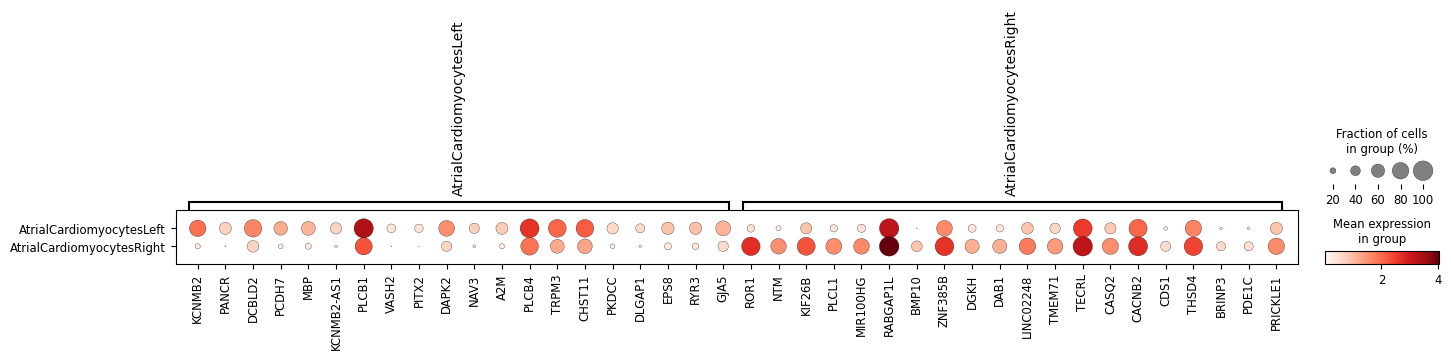

In [21]:
sc.tl.dendrogram(adata_gex,groupby="fine_grain",use_rep="X_multiVI")
sc.tl.rank_genes_groups(adata_gex,groupby="fine_grain")
sc.pl.rank_genes_groups_dotplot(adata_gex,groupby="fine_grain",n_genes=20)

df=sc.get.rank_genes_groups_df(adata,group="AtrialCardiomyocytesLeft",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
LEFT_or_RIGHT_features["LEFT_genes"]=df.names.tolist()

df=sc.get.rank_genes_groups_df(adata,group="AtrialCardiomyocytesRight",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
LEFT_or_RIGHT_features["RIGHT_genes"]=df.names.tolist()

### Functional interpretation of Left and Right CM sigantures

GO_Biological_Process_2021


Gene_set  \
14   GO_Biological_Process_2021   
13   GO_Biological_Process_2021   
5    GO_Biological_Process_2021   
6    GO_Biological_Process_2021   
25   GO_Biological_Process_2021   
24   GO_Biological_Process_2021   
23   GO_Biological_Process_2021   
22   GO_Biological_Process_2021   
8    GO_Biological_Process_2021   
40   GO_Biological_Process_2021   
39   GO_Biological_Process_2021   
38   GO_Biological_Process_2021   
37   GO_Biological_Process_2021   
1    GO_Biological_Process_2021   
46   GO_Biological_Process_2021   
47   GO_Biological_Process_2021   
48   GO_Biological_Process_2021   
12   GO_Biological_Process_2021   
31   GO_Biological_Process_2021   
30   GO_Biological_Process_2021   
28   GO_Biological_Process_2021   
29   GO_Biological_Process_2021   
16   GO_Biological_Process_2021   
134  GO_Biological_Process_2021   
133  GO_Biological_Process_2021   
132  GO_Biological_Process_2021   
129  GO_Biological_Process_2021   
135  GO_Biological_Process_2021   
127  GO_Biological_Process_2021   
128  GO_Biological_Process_2021   

                                                  Term Overlap   P-value  \
14           Roundabout signaling pathway (GO:0035385)     3/5  0.000952   
13        His-Purkinje system development (GO:0003164)     3/5  0.000952   
5    axon extension involved in axon guidance (GO:0...     4/8  0.000287   
6    neuron projection extension involved in neuron...     4/8  0.000287   
25   negative regulation of chemokine-mediated sign...     3/6  0.001837   
24    retinal ganglion cell axon guidance (GO:0031290)     3/6  0.001837   
23      gamma-aminobutyric acid transport (GO:0015812)     3/6  0.001837   
22   bundle of His cell-Purkinje myocyte adhesion i...     3/6  0.001837   
8    bundle of His cell to Purkinje myocyte communi...     4/9  0.000497   
40         neuron projection arborization (GO:0140058)     3/7  0.003103   
39   negative regulation of dendritic spine develop...     3/7  0.003103   
38   cardiac muscle cell-cardiac muscle cell adhesi...     3/7  0.003103   
37   regulation of aldosterone biosynthetic process...     3/7  0.003103   
1    ventricular cardiac muscle tissue development ...    7/25  0.000110   
46   regulation of chemokine-mediated signaling pat...     3/8  0.004793   
47           forebrain neuron development (GO:0021884)     3/8  0.004793   
48    stress-induced premature senescence (GO:0090400)     3/8  0.004793   
12          pulmonary valve morphogenesis (GO:0003184)    5/17  0.000858   
31   negative regulation of substrate adhesion-depe...    4/13  0.002427   
30   negative regulation of cell morphogenesis invo...    4/13  0.002427   
28   regulation of membrane repolarization (GO:0060...    4/13  0.002427   
29   semaphorin-plexin signaling pathway involved i...    4/13  0.002427   
16            pulmonary valve development (GO:0003177)    5/18  0.001142   
134  positive regulation of nucleotide-binding olig...     2/5  0.019907   
133  positive regulation of cAMP-dependent protein ...     2/5  0.019907   
132  positive regulation of blood-brain barrier per...     2/5  0.019907   
129  membrane repolarization during ventricular car...     2/5  0.019907   
135  positive regulation of protein catabolic proce...     2/5  0.019907   
127    striated muscle cell proliferation (GO:0014855)     2/5  0.019907   
128      mammary gland duct morphogenesis (GO:0060603)     2/5  0.019907   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
14           0.176549            0                     0   30.646302   
13           0.176549            0                     0   30.646302   
5            0.118606            0                     0   20.450644   
6            0.118606            0                     0   20.450644   
25           0.204555            0                     0   20.429796   
24           0.204555            0                     0   20.429796   
23           0.204555            0                     0   20.429796   
22  

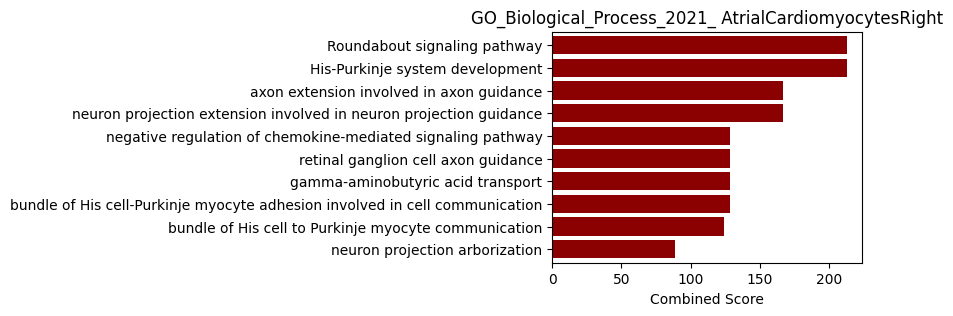

In [22]:
plot.GO_plot(gene_list=LEFT_or_RIGHT_features["RIGHT_genes"],display_table=True,
             gene_sets=['GO_Biological_Process_2021'],
             title_suffix=" AtrialCardiomyocytesRight",
            n_rank=10)

GO_Biological_Process_2023


Gene_set  \
1   GO_Biological_Process_2023   
2   GO_Biological_Process_2023   
0   GO_Biological_Process_2023   
13  GO_Biological_Process_2023   
20  GO_Biological_Process_2023   
3   GO_Biological_Process_2023   
35  GO_Biological_Process_2023   
34  GO_Biological_Process_2023   
17  GO_Biological_Process_2023   
18  GO_Biological_Process_2023   
15  GO_Biological_Process_2023   
7   GO_Biological_Process_2023   
62  GO_Biological_Process_2023   
63  GO_Biological_Process_2023   
64  GO_Biological_Process_2023   
60  GO_Biological_Process_2023   
61  GO_Biological_Process_2023   
25  GO_Biological_Process_2023   
23  GO_Biological_Process_2023   
24  GO_Biological_Process_2023   
11  GO_Biological_Process_2023   
10  GO_Biological_Process_2023   
9   GO_Biological_Process_2023   
4   GO_Biological_Process_2023   
12  GO_Biological_Process_2023   
30  GO_Biological_Process_2023   
31  GO_Biological_Process_2023   
19  GO_Biological_Process_2023   
8   GO_Biological_Process_2023   
82  GO_Biological_Process_2023   

                                                 Term Overlap       P-value  \
1           Sister Chromatid Segregation (GO:0000819)   17/34  2.460888e-11   
2               Mitotic Nuclear Division (GO:0140014)   18/45  6.408151e-10   
0   Mitotic Sister Chromatid Segregation (GO:0000070)  33/111  9.969119e-13   
13           Centromere Complex Assembly (GO:0034508)    7/14  2.161204e-05   
20  Regulation Of Attachment Of Spindle Microtubul...     5/9  1.894003e-04   
3   Microtubule Cytoskeleton Organization Involved...   20/59  2.266819e-09   
35  Regulation Of Chromosome Condensation (GO:0060...     4/7  7.849039e-04   
34  Positive Regulation Of Chromosome Condensation...     4/7  7.849039e-04   
17  Positive Regulation Of DNA-directed DNA Polyme...    6/12  8.723496e-05   
18  Regulation Of DNA-directed DNA Polymerase Acti...    6/12  8.723496e-05   
15  Positive Regulation Of Mitotic Sister Chromati...    7/15  3.800017e-05   
7   Negative Regulation Of Mitotic Metaphase/Anaph...   11/28  1.772709e-06   
62                 Notochord Development (GO:0030903)     3/5  3.335195e-03   
63  Positive Regulation Of Granulocyte Differentia...     3/5  3.335195e-03   
64  Resolution Of Recombination Intermediates (GO:...     3/5  3.335195e-03   
60          ERBB2-EGFR Signaling Pathway (GO:0038134)     3/5  3.335195e-03   
61  Centromeric Sister Chromatid Cohesion (GO:0070...     3/5  3.335195e-03   
25      Mitotic Spindle Midzone Assembly (GO:0051256)    5/10  3.563115e-04   
23              Kinetochore Organization (GO:0051383)    5/10  3.563115e-04   
24            Mitotic Spindle Elongation (GO:0000022)    5/10  3.563115e-04   
11  Spindle Assembly Checkpoint Signaling (GO:0071...   10/26  6.617366e-06   
10  Mitotic Spindle Checkpoint Signaling (GO:0071174)   10/26  6.617366e-06   
9   Mitotic Spindle Assembly Checkpoint Signaling ...   10/26  6.617366e-06   
4   Positive Regulation Of Cell Cycle Process (GO:...  29/118  3.357043e-09   
12  Regulation Of Chromosome Segregation (GO:0051983)   10/28  1.431070e-05   
30  Positive Regulation Of Metaphase/Anaphase Tran...    5/11  6.145280e-04   
31  Positive Regulation Of Mitotic Metaphase/Anaph...    5/11  6.145280e-04   
19  Positive Regulation Of Chromosome Segregation ...    7/18  1.550421e-04   
8            Metaphase Plate Congression (GO:0051310)   15/51  1.809141e-06   
82    Chromatin Remodeling At Centromere (GO:0031055)     3/6  6.313624e-03   

    Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
1       4.213041e-08            0                     0   13.030921   
2       7.313837e-07            0                     0    8.688701   
0       3.413426e-09            0                     0    5.557433   
13      5.285689e-03            0                     0   12.946964   
20      3.088126e-02            0                     0   16.163763   
3       1.940397e-06            0                     0    6.688696   
35      7.465308e-02

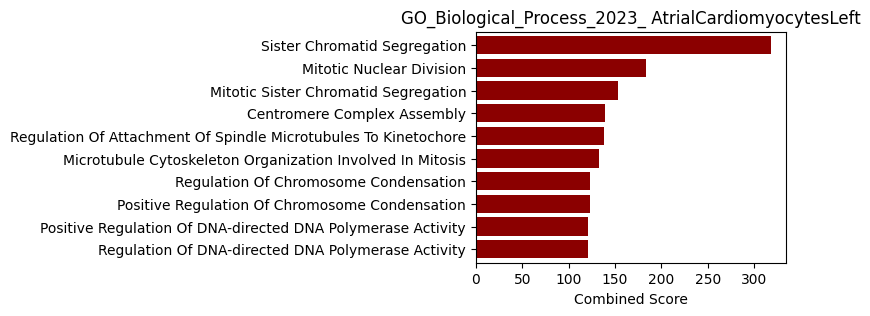

In [23]:
plot.GO_plot(gene_list=LEFT_or_RIGHT_features["LEFT_genes"],display_table=True,gene_sets=['GO_Biological_Process_2023'],title_suffix=" AtrialCardiomyocytesLeft")

## ATAC

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


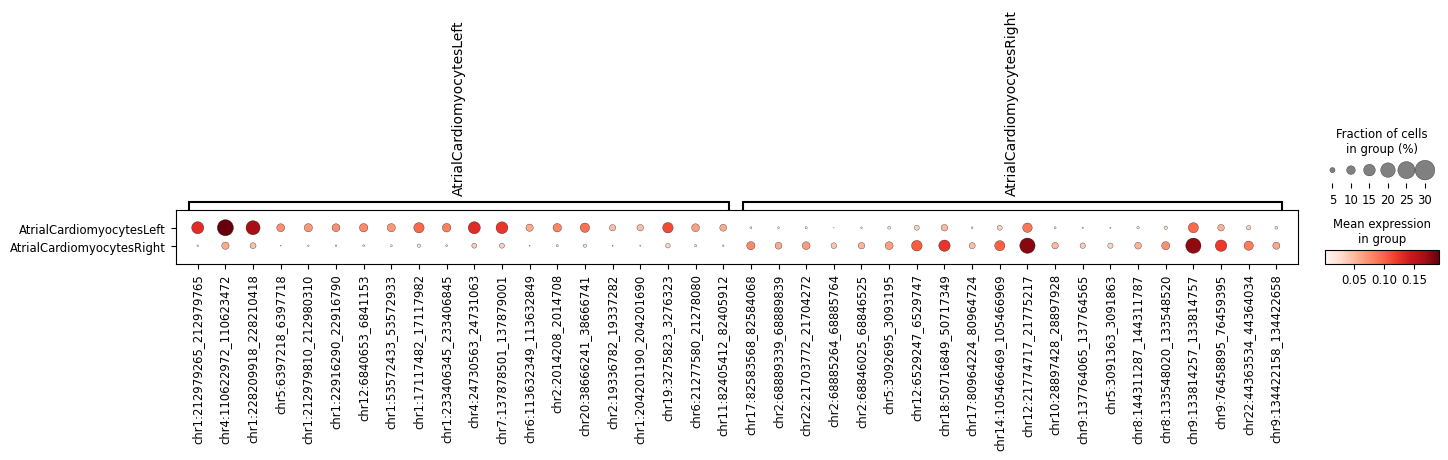

adding 5316 features for LEFT...
adding 3871 features for RIGHT...


In [24]:
sc.tl.dendrogram(adata_atac,groupby="fine_grain",use_rep="X_multiVI")
sc.tl.rank_genes_groups(adata_atac,groupby="fine_grain")
sc.pl.rank_genes_groups_dotplot(adata_atac,groupby="fine_grain",n_genes=20)

df=sc.get.rank_genes_groups_df(adata,group="AtrialCardiomyocytesLeft",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for LEFT...")
LEFT_or_RIGHT_features["LEFT_peaks"]=df.names.tolist()

df=sc.get.rank_genes_groups_df(adata,group="AtrialCardiomyocytesRight",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for RIGHT...")
LEFT_or_RIGHT_features["RIGHT_peaks"]=df.names.tolist()

In [25]:
# Instead of doing scanpy DE testing, we use the results of ArchR for this step
df=pd.read_csv("./DAR_testing/L-vs-R_aCM.csv")
df=df[(df.Log2FC>log2fc_min)&(df.FDR<pval_cutoff)]
df["names"]=df["seqnames"].astype(str)+":"+df["start"].astype(str)+"_"+df["end"].astype(str)
print(f"adding {len(df.names.tolist())} features for LEFT...")
LEFT_or_RIGHT_features["LEFT_peaks"]=df.names.tolist()

df=pd.read_csv("./DAR_testing/R-vs-L_aCM.csv")
df=df[(df.Log2FC>log2fc_min)&(df.FDR<pval_cutoff)]
df["names"]=df["seqnames"].astype(str)+":"+df["start"].astype(str)+"_"+df["end"].astype(str)
print(f"adding {len(df.names.tolist())} features for RIGHT...")
LEFT_or_RIGHT_features["RIGHT_peaks"]=df.names.tolist()

adding 132 features for LEFT...
adding 57 features for RIGHT...


## AUCgene

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


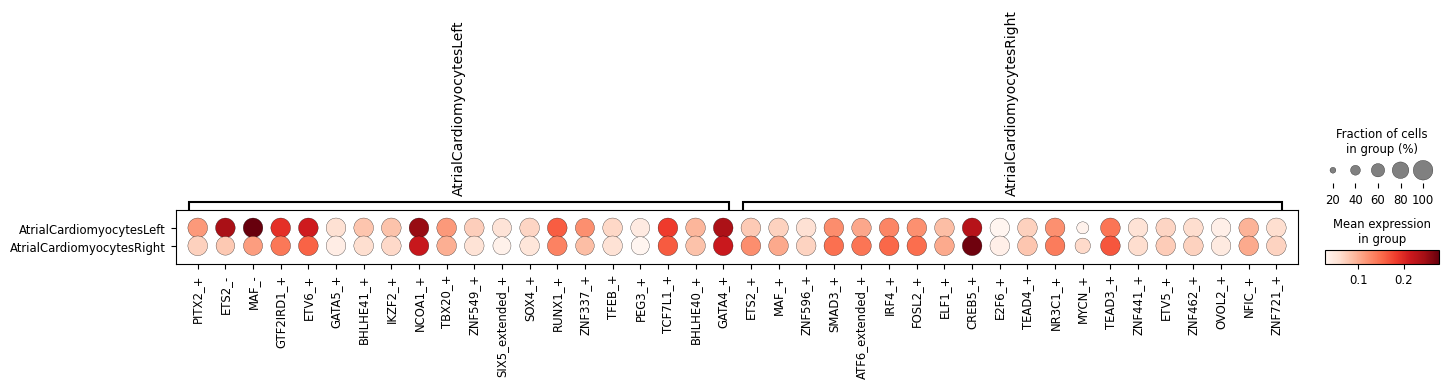

adding 11 features for LEFT...
adding 4 features for RIGHT...


In [26]:
sc.tl.dendrogram(adata_aucg,groupby="fine_grain",use_rep="X_multiVI")
sc.tl.rank_genes_groups(adata_aucg,groupby="fine_grain")
sc.pl.rank_genes_groups_dotplot(adata_aucg,groupby="fine_grain",n_genes=20)

df=sc.get.rank_genes_groups_df(adata_aucg,group="AtrialCardiomyocytesLeft",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for LEFT...")
LEFT_or_RIGHT_features["LEFT_AUCgene"]=df.names.tolist()

df=sc.get.rank_genes_groups_df(adata_aucg,group="AtrialCardiomyocytesRight",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for RIGHT...")
LEFT_or_RIGHT_features["RIGHT_AUCgene"]=df.names.tolist()

## AUCregion

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


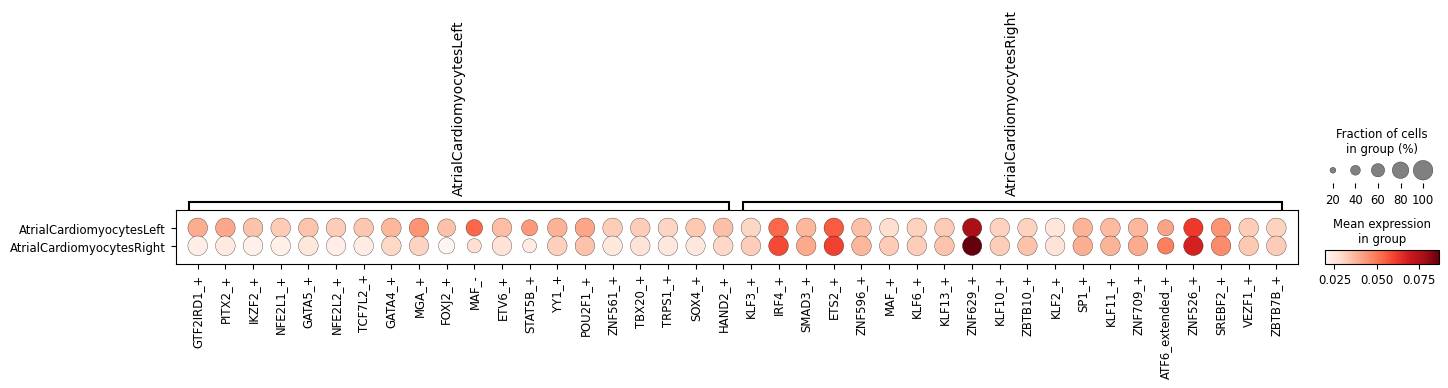

adding 15 features for LEFT...
adding 0 features for RIGHT...


In [27]:
sc.tl.dendrogram(adata_aucr,groupby="fine_grain",use_rep="X_multiVI")
sc.tl.rank_genes_groups(adata_aucr,groupby="fine_grain")
sc.pl.rank_genes_groups_dotplot(adata_aucr,groupby="fine_grain",n_genes=20)

df=sc.get.rank_genes_groups_df(adata_aucr,group="AtrialCardiomyocytesLeft",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for LEFT...")
LEFT_or_RIGHT_features["LEFT_AUCregion"]=df.names.tolist()

df=sc.get.rank_genes_groups_df(adata_aucr,group="AtrialCardiomyocytesRight",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for RIGHT...")
LEFT_or_RIGHT_features["RIGHT_AUCregion"]=df.names.tolist()

### Plot features which are specific to Left or Right aCMs

In [28]:
import scanpy as sc  # Import scanpy, assuming it's used for gene scoring and plotting

def plot_sided_features(adata, feature_type, associated_increasing_features_dict, cmap="RdPu", sides=["LEFT", "RIGHT", "COMMON","NON_SIDE_SPECIFIC"]):
    """
    Plots sided features for a given AnnData object and feature type.
    
    Args:
    adata (AnnData): An AnnData object containing gene expression data.
    feature_type (str): The type of feature to plot.
    associated_increasing_features_dict (dict): A dictionary containing associated increasing features.
    """
    # Copy the adata object to avoid modifying the original data
    plot_adata = adata.copy()

    # Initialize an empty list to store score names
    scores = []

    # Iterate over the sides and calculate scores for each
    for side in sides:
        # Retrieve the gene list from the dictionary
        gene_list = associated_increasing_features_dict[f"{feature_type}_{side}"]

        if gene_list:
            # Construct a unique name for the score
            score_name = f"{feature_type}_{side}_({len(gene_list)} features)"
            # Add the score name to the list
            scores.append(score_name)
            # Calculate the score using scanpy's score_genes function
            sc.tl.score_genes(plot_adata, gene_list=gene_list, score_name=score_name)

    # Plot the UMAP with the scores
    if len(scores)>0:
        sc.pl.umap(plot_adata, color=scores, ncols=3, wspace=0.8, cmap=cmap)

In [29]:
# New dictionary to store converted keys
LEFT_or_RIGHT_features_converted = {}

# Iterate through each item in LEFT_or_RIGHT_features
for key, value in LEFT_or_RIGHT_features.items():
    # Split the key on the underscore
    parts = key.split('_')
    
    # Rearrange the parts to match the desired format
    # New key format: 'genes_LEFT', 'genes_RIGHT', etc.
    new_key = f"{parts[1]}_{parts[0]}"

    # Add to the converted dictionary
    LEFT_or_RIGHT_features_converted[new_key] = value
LEFT_or_RIGHT_features_converted.keys()

dict_keys(['genes_LEFT', 'genes_RIGHT', 'peaks_LEFT', 'peaks_RIGHT', 'AUCgene_LEFT', 'AUCgene_RIGHT', 'AUCregion_LEFT', 'AUCregion_RIGHT'])

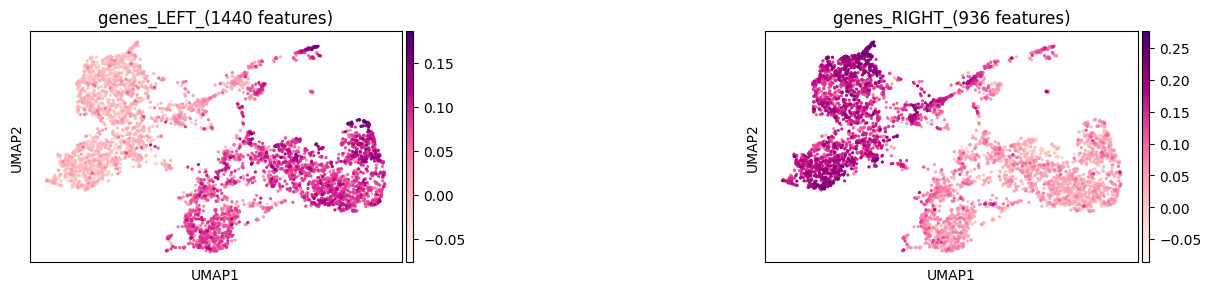

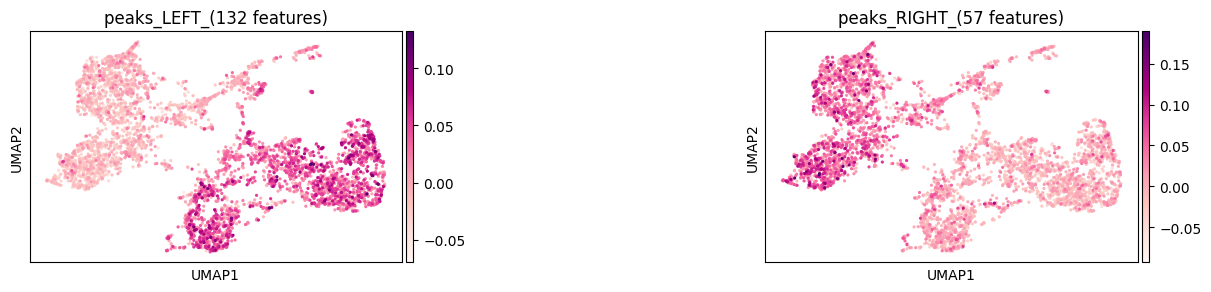

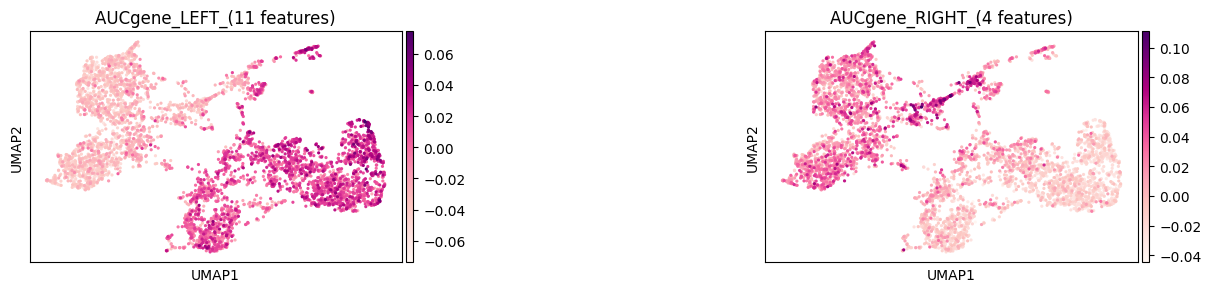

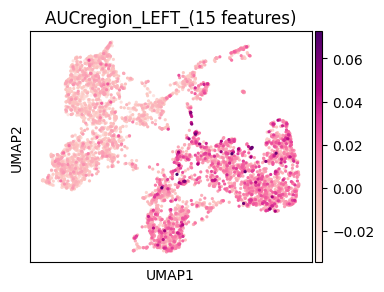

In [30]:
plot_sided_features(adata_gex,
                    sides=["LEFT","RIGHT"],
                    feature_type="genes",
                    associated_increasing_features_dict=LEFT_or_RIGHT_features_converted)

plot_sided_features(adata_atac,
                    sides=["LEFT","RIGHT"],
                    feature_type="peaks",
                    associated_increasing_features_dict=LEFT_or_RIGHT_features_converted)

plot_sided_features(adata_aucg,
                    sides=["LEFT","RIGHT"],
                    feature_type="AUCgene",
                    associated_increasing_features_dict=LEFT_or_RIGHT_features_converted)

plot_sided_features(adata_aucr,
                    sides=["LEFT","RIGHT"],
                    feature_type="AUCregion",
                    associated_increasing_features_dict=LEFT_or_RIGHT_features_converted)

In [31]:
print(LEFT_or_RIGHT_features_converted["AUCgene_LEFT"])
print(LEFT_or_RIGHT_features_converted["AUCregion_LEFT"])
print(LEFT_or_RIGHT_features_converted["AUCgene_RIGHT"])

['PITX2_+', 'ETS2_-', 'MAF_-', 'GATA5_+', 'SIX5_extended_+', 'ZNF337_+', 'PEG3_+', 'NFATC1_+', 'ZNF383_-', 'ARID3A_extended_-', 'MEF2A_-']
['GTF2IRD1_+', 'PITX2_+', 'IKZF2_+', 'NFE2L1_+', 'NFE2L2_+', 'TCF7L2_+', 'MGA_+', 'FOXJ2_+', 'MAF_-', 'STAT5B_+', 'MESP1_extended_+', 'ETS2_-', 'STAT4_+', 'ZNF337_+', 'ZNF470_+']
['ETS2_+', 'MAF_+', 'MYCN_+', 'ZNF526_+']


# Find features which increase over time

In [32]:
import pandas as pd
import numpy as np
from typing import Any

def bin_pseudotime(adata: Any, pseudotime_column: str, n_bins: int) -> Any:
    """
    Bin cells in an AnnData object into n_bins based on a specified pseudotime column.

    Parameters:
    adata (AnnData): The AnnData object containing single-cell data.
    pseudotime_column (str): The name of the column in adata.obs that contains pseudotime values.
    n_bins (int): The number of bins to divide the pseudotime values into.

    Returns:
    AnnData: The AnnData object with an additional column in adata.obs indicating the bin each cell belongs to.
    """
    # Calculate the percentiles that will be used as bin edges
    percentiles = [i*(100/n_bins) for i in range(1, n_bins)]
    bin_edges = np.percentile(adata.obs[pseudotime_column], percentiles)
    
    # Bin values into discrete intervals using pandas.cut
    adata.obs[f'{pseudotime_column}_bins'] = pd.cut(
        adata.obs[pseudotime_column],
        bins=np.insert(bin_edges, [0, len(bin_edges)], [adata.obs[pseudotime_column].min(), adata.obs[pseudotime_column].max()]),  # Include the extreme values of the pseudotime range
        include_lowest=True,
        right=True,
        labels=[str(i) for i in range(n_bins)]
    )
    
    # Return the modified AnnData object
    return adata

In [33]:
n_bins=2 # number of temporal bins

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/scratch126/c

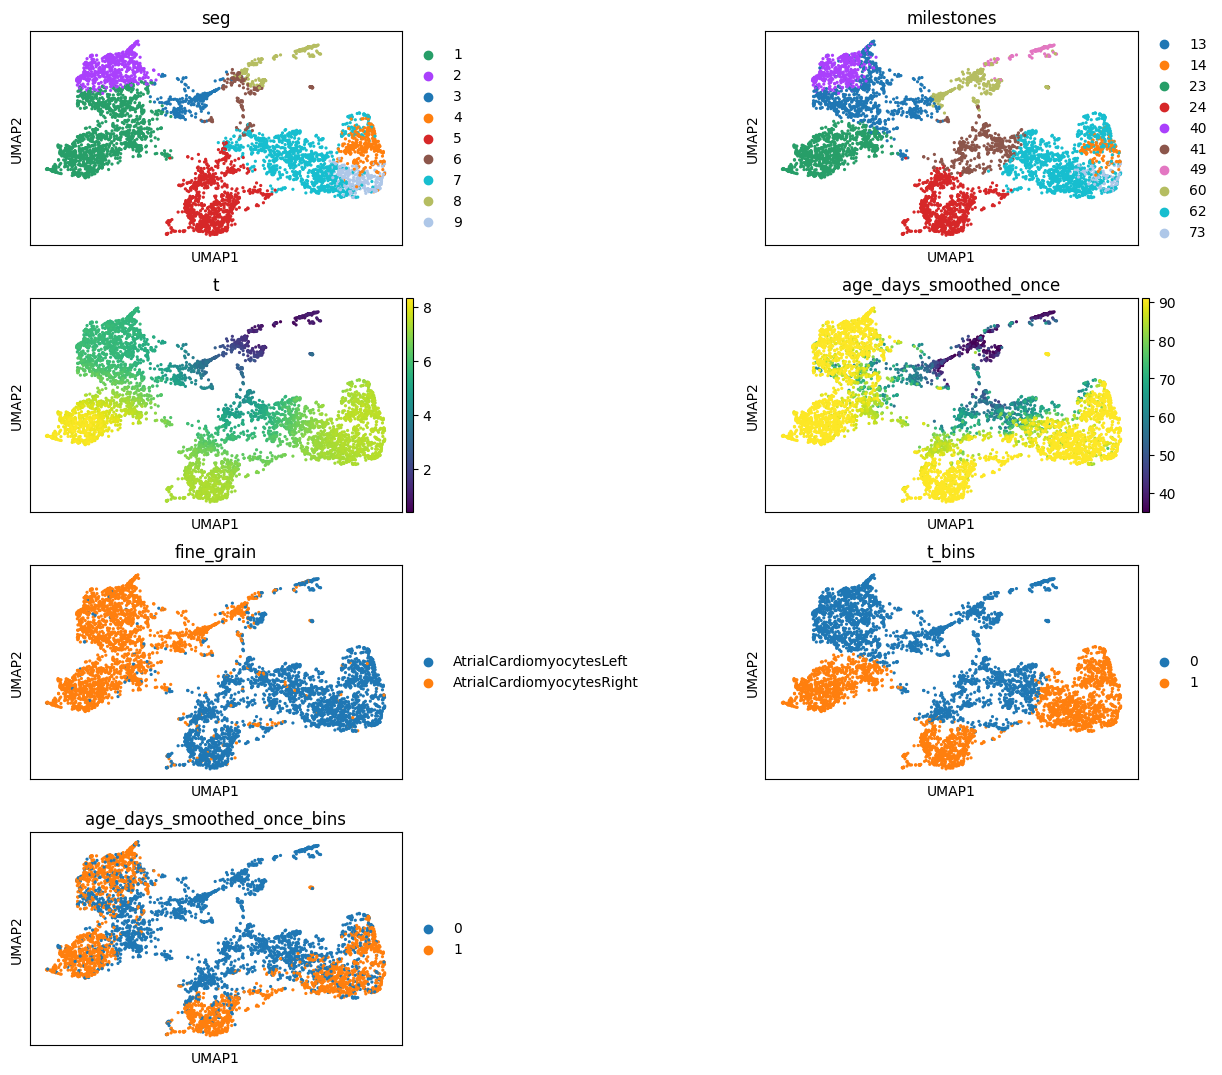

In [34]:
adata_gex = bin_pseudotime(adata_gex, 't', n_bins)
adata_atac = bin_pseudotime(adata_atac, 't', n_bins)

adata_gex = bin_pseudotime(adata_gex, temporal_ordering, n_bins)
adata_atac = bin_pseudotime(adata_atac, temporal_ordering, n_bins)

adata_aucg = bin_pseudotime(adata_aucg, 't', n_bins)
adata_aucr = bin_pseudotime(adata_aucg, 't', n_bins)

adata_aucg = bin_pseudotime(adata_aucr, temporal_ordering, n_bins)
adata_aucr = bin_pseudotime(adata_aucr, temporal_ordering, n_bins)

sc.pl.umap(adata_gex,color=["seg","milestones","t",temporal_ordering,"fine_grain","t_bins",f"{temporal_ordering}_bins"],ncols=2,wspace=0.8)

In [35]:
max_group=n_bins-1
max_group=str(max_group)
max_group

'1'

In [36]:
adata_gex.obs[f"{temporal_ordering}_bins"].value_counts()

0    2832
1    2832
Name: age_days_smoothed_once_bins, dtype: int64

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


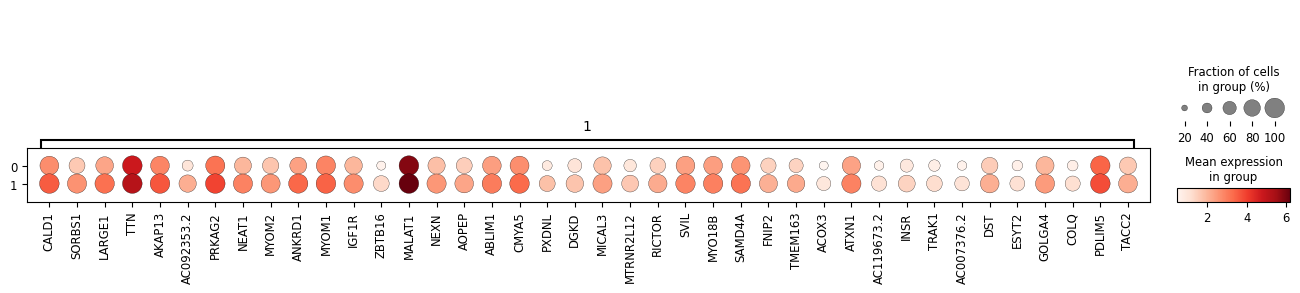

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


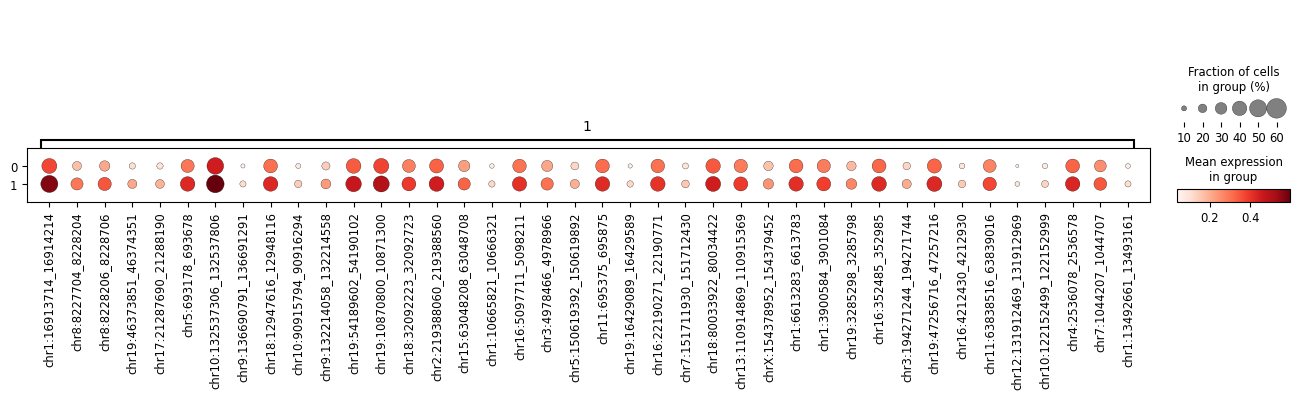

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


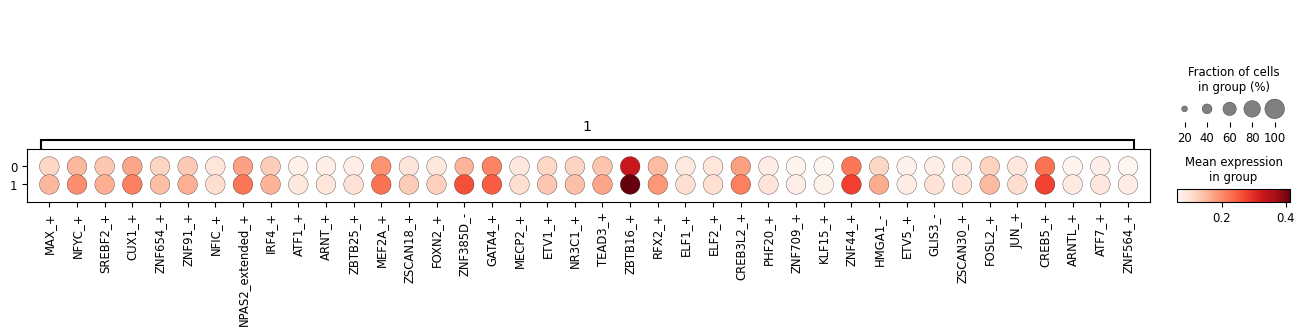

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


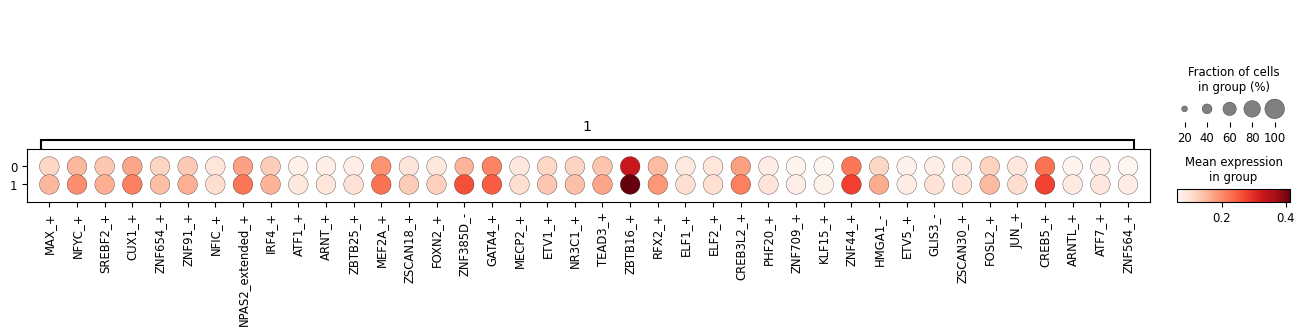

In [37]:
increasing_features_dict={}

sc.tl.rank_genes_groups(adata_gex,groupby=f"{temporal_ordering}_bins",groups=[max_group],reference="0")
sc.pl.rank_genes_groups_dotplot(adata_gex,groupby=f"{temporal_ordering}_bins",n_genes=40,dendrogram=False)

df=sc.get.rank_genes_groups_df(adata_gex,group=max_group,log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
increasing_features_dict["INCREASING_genes"]=df.names.tolist()




sc.tl.rank_genes_groups(adata_atac,groupby=f"{temporal_ordering}_bins",groups=[max_group],reference="0")
sc.pl.rank_genes_groups_dotplot(adata_atac,groupby=f"{temporal_ordering}_bins",n_genes=40,dendrogram=False)

df=sc.get.rank_genes_groups_df(adata_atac,group=max_group,log2fc_min=log2fc_min)
#df=df[df.pvals_adj<pval_cutoff]
df=df[df.pvals<pval_cutoff] #pvals
increasing_features_dict["INCREASING_peaks"]=df.names.tolist()




sc.tl.rank_genes_groups(adata_aucg,groupby=f"{temporal_ordering}_bins",groups=[max_group],reference="0")
sc.pl.rank_genes_groups_dotplot(adata_aucg,groupby=f"{temporal_ordering}_bins",n_genes=40,dendrogram=False)

df=sc.get.rank_genes_groups_df(adata_aucg,group=max_group,log2fc_min=log2fc_min)
#df=df[df.pvals_adj<pval_cutoff]
df=df[df.pvals<pval_cutoff] #pvals
increasing_features_dict["INCREASING_AUCgene"]=df.names.tolist()




sc.tl.rank_genes_groups(adata_aucr,groupby=f"{temporal_ordering}_bins",groups=[max_group],reference="0")
sc.pl.rank_genes_groups_dotplot(adata_aucr,groupby=f"{temporal_ordering}_bins",n_genes=40,dendrogram=False)

df=sc.get.rank_genes_groups_df(adata_aucr,group=max_group,log2fc_min=log2fc_min)
#df=df[df.pvals_adj<pval_cutoff]
df=df[df.pvals<pval_cutoff] #pvals
increasing_features_dict["INCREASING_AUCregion"]=df.names.tolist()

### Functional interpretation of genes which increase over time across all aCMs

MSigDB_Hallmark_2020


Gene_set                               Term Overlap   P-value  \
0   MSigDB_Hallmark_2020                     UV Response Dn  21/144  0.000108   
1   MSigDB_Hallmark_2020                            Hypoxia  25/200  0.000309   
2   MSigDB_Hallmark_2020                         Myogenesis  24/200  0.000731   
3   MSigDB_Hallmark_2020            Estrogen Response Early  22/200  0.003578   
4   MSigDB_Hallmark_2020      TNF-alpha Signaling via NF-kB  21/200  0.007388   
5   MSigDB_Hallmark_2020                  Androgen Response  10/100  0.069939   
6   MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition  17/200  0.082309   
7   MSigDB_Hallmark_2020                    heme Metabolism  17/200  0.082309   
8   MSigDB_Hallmark_2020                    Mitotic Spindle  16/199  0.128259   
9   MSigDB_Hallmark_2020             Estrogen Response Late  16/200  0.132255   
10  MSigDB_Hallmark_2020                        p53 Pathway  15/200  0.201480   
11  MSigDB_Hallmark_2020               IL-2/STAT5 Signaling  14/199  0.284608   
13  MSigDB_Hallmark_2020                 Hedgehog Signaling    3/36  0.356811   
14  MSigDB_Hallmark_2020                       Angiogenesis    3/36  0.356811   
12  MSigDB_Hallmark_2020               Bile Acid Metabolism   8/112  0.339371   
15  MSigDB_Hallmark_2020                         Glycolysis  13/200  0.397914   
16  MSigDB_Hallmark_2020           PI3K/AKT/mTOR  Signaling   7/105  0.424220   
17  MSigDB_Hallmark_2020         Wnt-beta Catenin Signaling    3/42  0.453256   
18  MSigDB_Hallmark_2020              Xenobiotic Metabolism  12/200  0.516217   
19  MSigDB_Hallmark_2020              Fatty Acid Metabolism   9/158  0.589649   
20  MSigDB_Hallmark_2020                 TGF-beta Signaling    3/54  0.623902   
21  MSigDB_Hallmark_2020          Interferon Alpha Response    5/97  0.682976   
25  MSigDB_Hallmark_2020                   mTORC1 Signaling  10/200  0.746925   
24  MSigDB_Hallmark_2020                         Complement  10/200  0.746925   
23  MSigDB_Hallmark_2020                    Apical Junction  10/200  0.746925   
22  MSigDB_Hallmark_2020                     Apical Surface    2/44  0.740649   
27  MSigDB_Hallmark_2020                     UV Response Up   7/158  0.828934   
26  MSigDB_Hallmark_2020                  Protein Secretion    4/96  0.824283   
28  MSigDB_Hallmark_2020          Interferon Gamma Response   9/200  0.839361   
31  MSigDB_Hallmark_2020                        Pperoxisome   4/104  0.868160   

    Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0           0.005282            0                     0    2.759302   
1           0.007564            0                     0    2.310370   
2           0.011932            0                     0    2.203324   
3           0.043828            0                     0    1.993352   
4           0.072407            0                     0    1.890378   
5           0.504144            0                     0    1.781963   
6           0.504144            0                     0    1.491380   
7           0.504144            0                     0    1.491380   
8           0.648048            0                     0    1.402443   
9           0.648048            0                     0    1.394747   
10          0.897502            0                     0    1.299319   
11          0.999928            0                     0    1.211656   
13          0.999928            0                     0    1.453694   
14          0.999928            0                     0    1.453694   
12          0.999928            0                     0    1.230638   
15          0.999928            0                     0    1.112001   
16          0.999928            0                     0    1.142125   
17          0.999928            0                     0    1.229656   
18          0.999928            0                     0    1.020072   
19          0.999928            0                     0    0.964841   
20          0

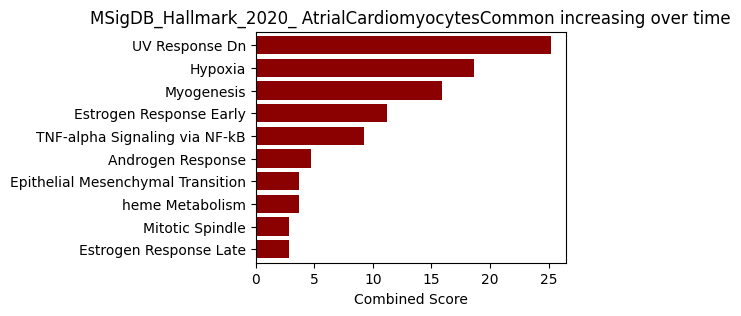

In [38]:
plot.GO_plot(gene_list=increasing_features_dict["INCREASING_genes"],display_table=True,
             gene_sets=['MSigDB_Hallmark_2020'],
             title_suffix=" AtrialCardiomyocytesCommon increasing over time")

# Find features which are associated with time and are increasing over time

Features will be
- `A` > 0.5
- `fdr`<0.01
- Intersect with `increasing_features_dict` list - i.e. they are increasing over time, not decreasing

In [39]:
from tqdm import tqdm
import pandas as pd

sort_col = "A"
cutoff_col = 'fdr'
cutoff_value = 1e-1

associated_increasing_features_dict = {}

for feature in tqdm(["genes", "peaks", "AUCgene", "AUCregion"]):
    print("\n######### {} #########\n".format(feature))
    
    associated_increasing_NONsidespecific_features = []

    for side in ["LEFT", "RIGHT"]:
        # Load and sort the data
        df = pd.read_csv(f"./fitted_features/aCMs_WholeSample_scfatespseudotime_{feature}_{side}.csv", index_col=0)
        df = df.sort_values(sort_col, ascending=False).drop(columns="activator_repressor")
        print(f"Total number of {feature}_{side} before filtering: {len(df)}")
        
        # Apply cutoff and filter positive 'A' values
        associated_features = df[(df[cutoff_col] < cutoff_value) & (df["A"] > 0.5)].index.tolist()
        print(f"Number of {feature}_{side} after cutoff and 'A' filtering: {len(associated_features)}")
        
        # Filter for increasing features
        increasing_features = increasing_features_dict[f"INCREASING_{feature}"]
        print(f"Number of increasing {feature}: {len(increasing_features)}")
        
        # Find associated increasing features
        associated_increasing_features = [f for f in associated_features if f in increasing_features]
        print(f"Number of increasing {feature}_{side} after associating: {len(associated_increasing_features)}")
        
        # Filter for side-specific features
        side_specific_features = LEFT_or_RIGHT_features[f"{side}_{feature}"]
        print(f"Number of {side}-specific {feature}: {len(side_specific_features)}")
        
        # Find associated increasing side-specific features
        associated_increasing_sidespecific_features = [f for f in associated_increasing_features if f in side_specific_features]
        print(f"Number of associated increasing {side}-specific {feature}: {len(associated_increasing_sidespecific_features)}")
        
        # Find non-side-specific features
        non_side_specific_features = [f for f in associated_increasing_features if f not in side_specific_features]
        print(f"Number of associated increasing non-{side}-specific {feature}: {len(non_side_specific_features)}")
        
        # Combine non-side-specific features for later processing
        associated_increasing_NONsidespecific_features.extend(non_side_specific_features)
        
        # Store side-specific features
        associated_increasing_features_dict[f"{feature}_{side}"] = associated_increasing_sidespecific_features

    # Deduplicate the list of non-side-specific features
    non_side_specific_set = set(associated_increasing_NONsidespecific_features)
    print(f"Total number of associated increasing non-side-specific {feature}: {len(non_side_specific_set)}")

    # Store these NonSideSpecific features
    associated_increasing_features_dict[f"{feature}_NON_SIDE_SPECIFIC"] = list(non_side_specific_set)

    # Identify common features (present in both LEFT and RIGHT)
    common_features = non_side_specific_set.intersection(
        associated_increasing_features_dict[f"{feature}_LEFT"],
        associated_increasing_features_dict[f"{feature}_RIGHT"]
    )
    associated_increasing_features_dict[f"{feature}_COMMON"] = list(common_features)
    print(f"Total number of common non-side-specific {feature}: {len(common_features)}")

# Calculate and display counts for each category
counts_dict = {key: len(value) for key, value in associated_increasing_features_dict.items()}
print("\nCounts per category:")
for key, value in counts_dict.items():
    print(f"{key}: {value}")


  0%|                                                                                                                                                                                                                     | 0/4 [00:00<?, ?it/s]


######### genes #########

Total number of genes_LEFT before filtering: 21922


 25%|███████████████████████████████████████████████████▎                                                                                                                                                         | 1/4 [00:00<00:00,  7.55it/s]

Number of genes_LEFT after cutoff and 'A' filtering: 3626
Number of increasing genes: 1178
Number of increasing genes_LEFT after associating: 577
Number of LEFT-specific genes: 1440
Number of associated increasing LEFT-specific genes: 98
Number of associated increasing non-LEFT-specific genes: 479
Total number of genes_RIGHT before filtering: 21024
Number of genes_RIGHT after cutoff and 'A' filtering: 3439
Number of increasing genes: 1178
Number of increasing genes_RIGHT after associating: 485
Number of RIGHT-specific genes: 936
Number of associated increasing RIGHT-specific genes: 83
Number of associated increasing non-RIGHT-specific genes: 402
Total number of associated increasing non-side-specific genes: 569
Total number of common non-side-specific genes: 0

######### peaks #########

Total number of peaks_LEFT before filtering: 167061
Number of peaks_LEFT after cutoff and 'A' filtering: 4835
Number of increasing peaks: 5856
Number of increasing peaks_LEFT after associating: 113
Num

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.87it/s]

Number of increasing peaks_RIGHT after associating: 166
Number of RIGHT-specific peaks: 57
Number of associated increasing RIGHT-specific peaks: 0
Number of associated increasing non-RIGHT-specific peaks: 166
Total number of associated increasing non-side-specific peaks: 262
Total number of common non-side-specific peaks: 0

######### AUCgene #########

Total number of AUCgene_LEFT before filtering: 278
Number of AUCgene_LEFT after cutoff and 'A' filtering: 83
Number of increasing AUCgene: 4
Number of increasing AUCgene_LEFT after associating: 4
Number of LEFT-specific AUCgene: 11
Number of associated increasing LEFT-specific AUCgene: 0
Number of associated increasing non-LEFT-specific AUCgene: 4
Total number of AUCgene_RIGHT before filtering: 278
Number of AUCgene_RIGHT after cutoff and 'A' filtering: 85
Number of increasing AUCgene: 4
Number of increasing AUCgene_RIGHT after associating: 4
Number of RIGHT-specific AUCgene: 4
Number of associated increasing RIGHT-specific AUCgene: 0
N

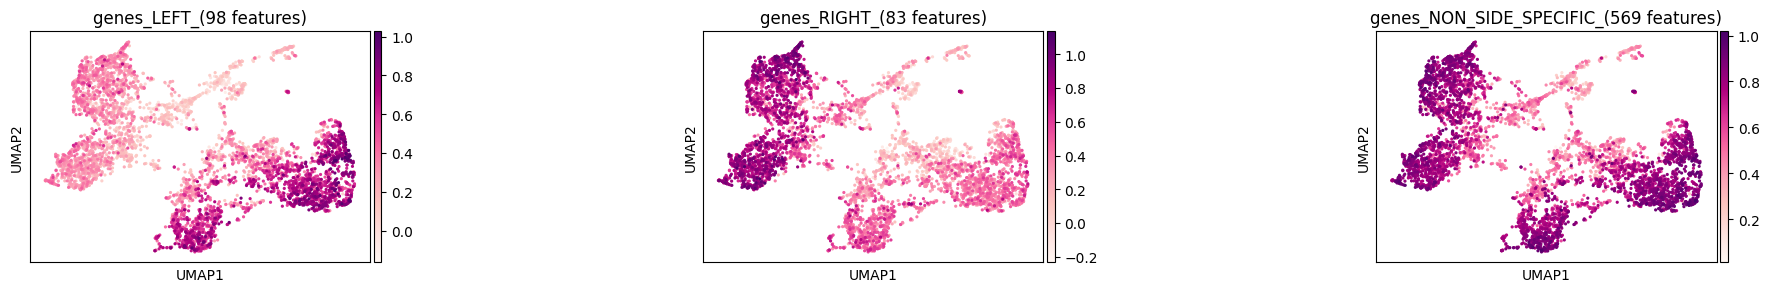

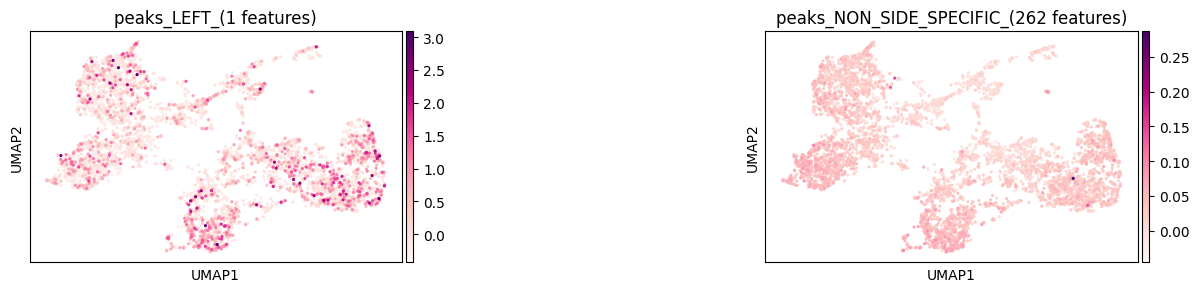

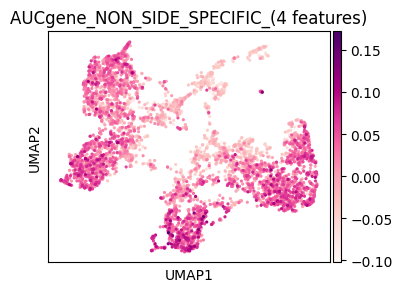

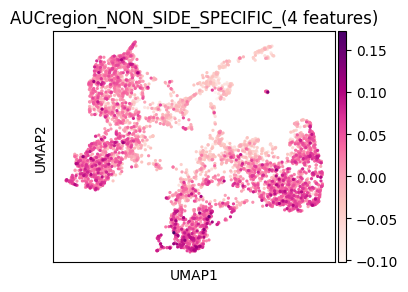

In [40]:
plot_sided_features(adata_gex,
                    feature_type="genes",
                    associated_increasing_features_dict=associated_increasing_features_dict)

plot_sided_features(adata_atac,
                    feature_type="peaks",
                    associated_increasing_features_dict=associated_increasing_features_dict)

plot_sided_features(adata_aucg,
                    feature_type="AUCgene",
                    associated_increasing_features_dict=associated_increasing_features_dict)

plot_sided_features(adata_aucr,
                    feature_type="AUCregion",
                    associated_increasing_features_dict=associated_increasing_features_dict)

# Fit expression of features which change (increase or decrease) over time

We start by definign a stricter set of L and R specific genes

In [41]:
LEFT_or_RIGHT_features={}

In [42]:
log2fc_min=2
pval_cutoff=0.05

## GEX

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


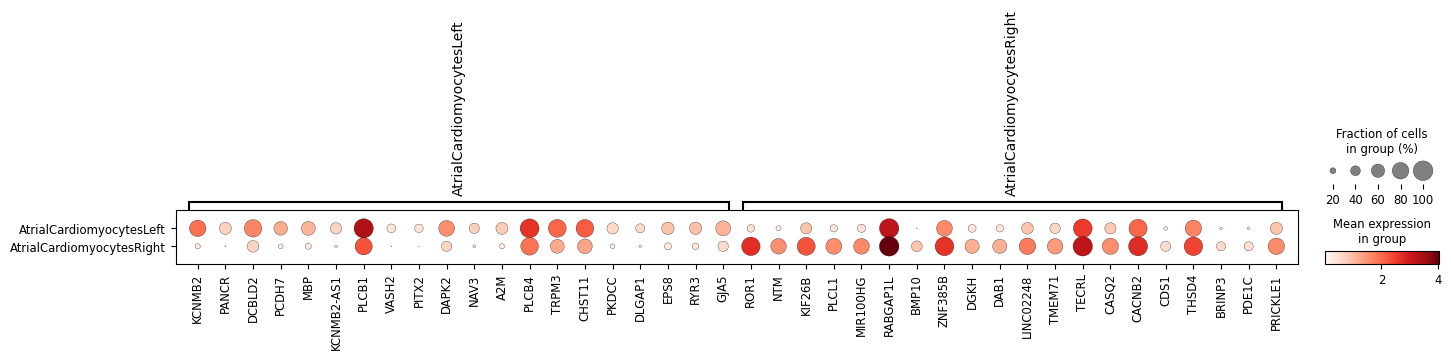

In [43]:
sc.tl.dendrogram(adata_gex,groupby="fine_grain",use_rep="X_multiVI")
sc.tl.rank_genes_groups(adata_gex,groupby="fine_grain")
sc.pl.rank_genes_groups_dotplot(adata_gex,groupby="fine_grain",n_genes=20)

df=sc.get.rank_genes_groups_df(adata,group="AtrialCardiomyocytesLeft",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
LEFT_or_RIGHT_features["LEFT_genes"]=df.names.tolist()

df=sc.get.rank_genes_groups_df(adata,group="AtrialCardiomyocytesRight",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
LEFT_or_RIGHT_features["RIGHT_genes"]=df.names.tolist()

## ATAC

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


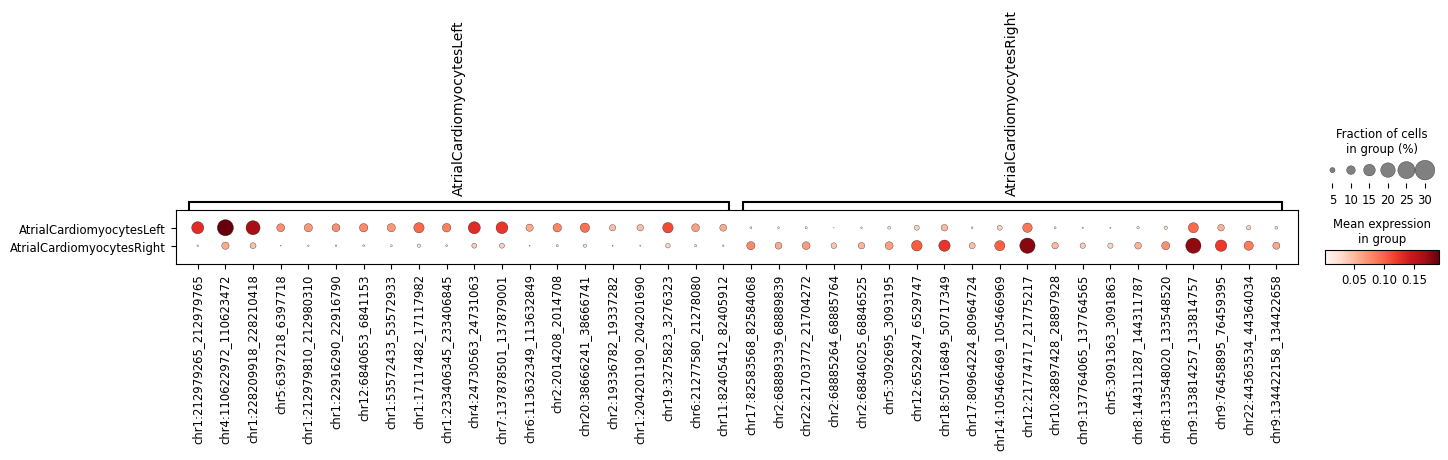

adding 1100 features for LEFT...
adding 414 features for RIGHT...


In [44]:
sc.tl.dendrogram(adata_atac,groupby="fine_grain",use_rep="X_multiVI")
sc.tl.rank_genes_groups(adata_atac,groupby="fine_grain")
sc.pl.rank_genes_groups_dotplot(adata_atac,groupby="fine_grain",n_genes=20)

df=sc.get.rank_genes_groups_df(adata,group="AtrialCardiomyocytesLeft",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for LEFT...")
LEFT_or_RIGHT_features["LEFT_peaks"]=df.names.tolist()

df=sc.get.rank_genes_groups_df(adata,group="AtrialCardiomyocytesRight",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for RIGHT...")
LEFT_or_RIGHT_features["RIGHT_peaks"]=df.names.tolist()

In [45]:
# Instead of doing scanpy DE testing, we use the results of ArchR for this step
df=pd.read_csv("./DAR_testing/L-vs-R_aCM.csv")
df=df[(df.Log2FC>log2fc_min)&(df.FDR<pval_cutoff)]
df["names"]=df["seqnames"].astype(str)+":"+df["start"].astype(str)+"_"+df["end"].astype(str)
print(f"adding {len(df.names.tolist())} features for LEFT...")
LEFT_or_RIGHT_features["LEFT_peaks"]=df.names.tolist()

df=pd.read_csv("./DAR_testing/R-vs-L_aCM.csv")
df=df[(df.Log2FC>log2fc_min)&(df.FDR<pval_cutoff)]
df["names"]=df["seqnames"].astype(str)+":"+df["start"].astype(str)+"_"+df["end"].astype(str)
print(f"adding {len(df.names.tolist())} features for RIGHT...")
LEFT_or_RIGHT_features["RIGHT_peaks"]=df.names.tolist()

adding 71 features for LEFT...
adding 19 features for RIGHT...


## AUCgene

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


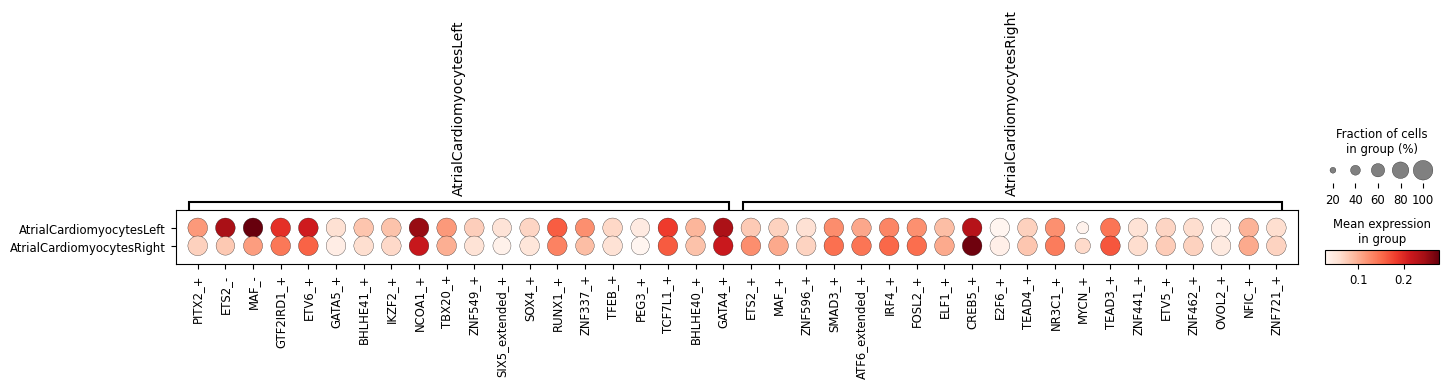

adding 0 features for LEFT...
adding 0 features for RIGHT...


In [46]:
sc.tl.dendrogram(adata_aucg,groupby="fine_grain",use_rep="X_multiVI")
sc.tl.rank_genes_groups(adata_aucg,groupby="fine_grain")
sc.pl.rank_genes_groups_dotplot(adata_aucg,groupby="fine_grain",n_genes=20)

df=sc.get.rank_genes_groups_df(adata_aucg,group="AtrialCardiomyocytesLeft",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for LEFT...")
LEFT_or_RIGHT_features["LEFT_AUCgene"]=df.names.tolist()

df=sc.get.rank_genes_groups_df(adata_aucg,group="AtrialCardiomyocytesRight",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for RIGHT...")
LEFT_or_RIGHT_features["RIGHT_AUCgene"]=df.names.tolist()

## AUCregion

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


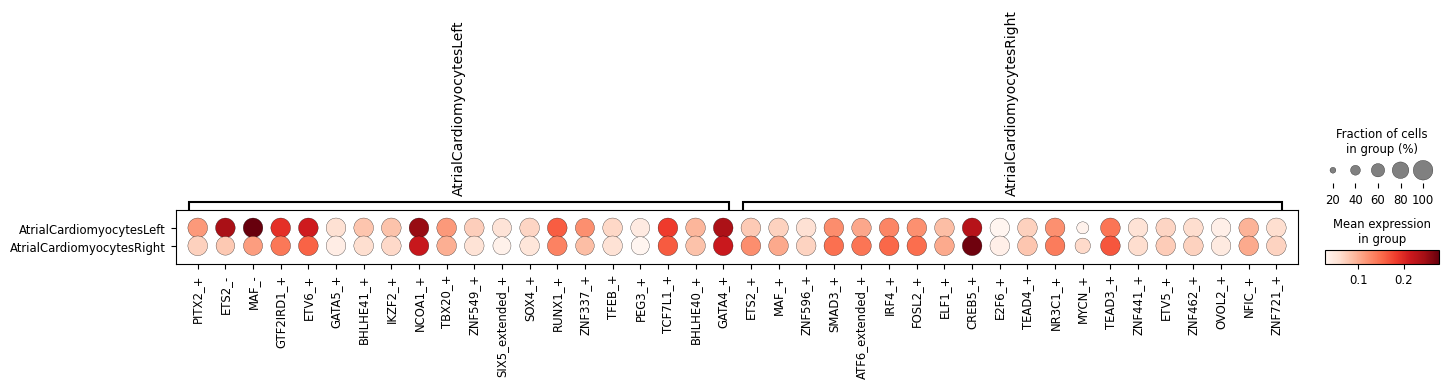

adding 0 features for LEFT...
adding 0 features for RIGHT...


In [47]:
sc.tl.dendrogram(adata_aucr,groupby="fine_grain",use_rep="X_multiVI")
sc.tl.rank_genes_groups(adata_aucr,groupby="fine_grain")
sc.pl.rank_genes_groups_dotplot(adata_aucr,groupby="fine_grain",n_genes=20)

df=sc.get.rank_genes_groups_df(adata_aucr,group="AtrialCardiomyocytesLeft",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for LEFT...")
LEFT_or_RIGHT_features["LEFT_AUCregion"]=df.names.tolist()

df=sc.get.rank_genes_groups_df(adata_aucr,group="AtrialCardiomyocytesRight",log2fc_min=log2fc_min)
df=df[df.pvals_adj<pval_cutoff]
print(f"adding {len(df.names.tolist())} features for RIGHT...")
LEFT_or_RIGHT_features["RIGHT_AUCregion"]=df.names.tolist()

In [48]:
from tqdm import tqdm
import pandas as pd

sort_col="A"
cutff_col = 'fdr'
cutoff_value = 1e-1

associated_features_dict = {}

for feature in tqdm(["genes", "peaks", "AUCgene", "AUCregion"]):
    print("\n")
    print(f"######### {feature} #########")
    print("\n")
    
    associated_increasing_NONsidespecific_features = []

    for side in ["LEFT", "RIGHT"]:
        # Read and sort the CSV file
        df = pd.read_csv(f"./fitted_features/aCMs_WholeSample_scfatespseudotime_{feature}_{side}.csv", index_col=0).sort_values(sort_col,ascending=False)
        df = df.drop(columns="activator_repressor")
        print(f"Total number of {feature}_{side} before filtering: {len(df)}")
        
        associated_features = df[(df[cutff_col] < cutoff_value) & (df["A"] > 1)].index.tolist()
        print(f"Number of {feature}_{side} after cutoff and 'A' filtering: {len(associated_features)}")
        
        # Filter for side-specific features
        side_specific_features = LEFT_or_RIGHT_features[f"{side}_{feature}"]
        print(f"Number of {side}-specific {feature}: {len(side_specific_features)}")
        
        associated_sidespecific_features = [f for f in associated_features if f in side_specific_features]
        print(f"Number of associated {side}-specific {feature}: {len(associated_sidespecific_features)}")
        
        associated_features_dict[f"{feature}_{side}"] = associated_sidespecific_features

    # Read in COMMON features which are associated with pseudotime
    df = pd.read_csv(f"./fitted_features/aCMs_WholeSample_scfatespseudotime_{feature}_COMMON.csv", index_col=0).sort_values(sort_col,ascending=False)
    df = df.drop(columns="activator_repressor")
    print(f"Total number of {feature}_COMMON before filtering: {len(df)}")
    
    associated_features = df[(df[cutff_col] < cutoff_value) & (df["A"] > 1)].index.tolist()
    print(f"Number of {feature}_COMMON after cutoff and 'A' filtering: {len(associated_features)}")

    # Filter out any features which are known to be side-specific
    LEFT_side_specific_features = LEFT_or_RIGHT_features[f"LEFT_{feature}"]
    RIGHT_side_specific_features = LEFT_or_RIGHT_features[f"RIGHT_{feature}"]
    LEFT_or_RIGHT_side_specific_features=LEFT_side_specific_features+RIGHT_side_specific_features
    print(f"Number of (either) side-specific {feature}: {len(LEFT_or_RIGHT_side_specific_features)}")

    associated_non_sidespecific_features = [f for f in associated_features if f not in LEFT_or_RIGHT_side_specific_features]
    print(f"Number of associated non-side-specific {feature}: {len(associated_non_sidespecific_features)}")

    associated_features_dict[f"{feature}_COMMON"]=associated_non_sidespecific_features

# Calculate the counts for each category
counts_dict = {key: len(value) for key, value in associated_features_dict.items()}
print("\nCounts per category:")
for key, value in counts_dict.items():
    print(f"{key}: {value}")


  0%|                                                                                                                                                                                                                     | 0/4 [00:00<?, ?it/s]



######### genes #########


Total number of genes_LEFT before filtering: 21922
Number of genes_LEFT after cutoff and 'A' filtering: 2519
Number of LEFT-specific genes: 209
Number of associated LEFT-specific genes: 28
Total number of genes_RIGHT before filtering: 21024
Number of genes_RIGHT after cutoff and 'A' filtering: 2584
Number of RIGHT-specific genes: 129
Number of associated RIGHT-specific genes: 29


 25%|███████████████████████████████████████████████████▎                                                                                                                                                         | 1/4 [00:00<00:00,  4.54it/s]

Total number of genes_COMMON before filtering: 23953
Number of genes_COMMON after cutoff and 'A' filtering: 1081
Number of (either) side-specific genes: 338
Number of associated non-side-specific genes: 1048


######### peaks #########


Total number of peaks_LEFT before filtering: 167061
Number of peaks_LEFT after cutoff and 'A' filtering: 1122
Number of LEFT-specific peaks: 71
Number of associated LEFT-specific peaks: 0
Total number of peaks_RIGHT before filtering: 166063
Number of peaks_RIGHT after cutoff and 'A' filtering: 3933
Number of RIGHT-specific peaks: 19
Number of associated RIGHT-specific peaks: 0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.70it/s]

Total number of peaks_COMMON before filtering: 165795
Number of peaks_COMMON after cutoff and 'A' filtering: 0
Number of (either) side-specific peaks: 90
Number of associated non-side-specific peaks: 0


######### AUCgene #########


Total number of AUCgene_LEFT before filtering: 278
Number of AUCgene_LEFT after cutoff and 'A' filtering: 62
Number of LEFT-specific AUCgene: 0
Number of associated LEFT-specific AUCgene: 0
Total number of AUCgene_RIGHT before filtering: 278
Number of AUCgene_RIGHT after cutoff and 'A' filtering: 69
Number of RIGHT-specific AUCgene: 0
Number of associated RIGHT-specific AUCgene: 0
Total number of AUCgene_COMMON before filtering: 278
Number of AUCgene_COMMON after cutoff and 'A' filtering: 52
Number of (either) side-specific AUCgene: 0
Number of associated non-side-specific AUCgene: 52


######### AUCregion #########


Total number of AUCregion_LEFT before filtering: 278
Number of AUCregion_LEFT after cutoff and 'A' filtering: 50
Number of LEFT-specific AUC

In [49]:
# similar to before but we do not filter using the increasing features dictionary
from tqdm import tqdm
import pandas as pd

sort_col = "A"
cutoff_col = 'fdr'
cutoff_value = 1e-1

associated_increasing_features_dict = {}

for feature in tqdm(["genes", "peaks", "AUCgene", "AUCregion"]):
    print("\n######### {} #########\n".format(feature))
    
    associated_increasing_NONsidespecific_features = []

    for side in ["LEFT", "RIGHT"]:
        # Load and sort the data
        df = pd.read_csv(f"./fitted_features/aCMs_WholeSample_scfatespseudotime_{feature}_{side}.csv", index_col=0)
        df = df.sort_values(sort_col, ascending=False).drop(columns="activator_repressor")
        print(f"Total number of {feature}_{side} before filtering: {len(df)}")
        
        # Apply cutoff and filter positive 'A' values
        associated_features = df[(df[cutoff_col] < cutoff_value) & (df["A"] > 0.5)].index.tolist()
        print(f"Number of {feature}_{side} after cutoff and 'A' filtering: {len(associated_features)}")
        
        # Filter for increasing features
        #increasing_features = increasing_features_dict[f"INCREASING_{feature}"]
        #print(f"Number of increasing {feature}: {len(increasing_features)}")
        
        # Find associated increasing features
        #associated_increasing_features = [f for f in associated_features if f in increasing_features]
        #print(f"Number of increasing {feature}_{side} after associating: {len(associated_increasing_features)}")

        associated_increasing_features=associated_features
        
        # Filter for side-specific features
        side_specific_features = LEFT_or_RIGHT_features[f"{side}_{feature}"]
        print(f"Number of {side}-specific {feature}: {len(side_specific_features)}")
        
        # Find associated increasing side-specific features
        associated_increasing_sidespecific_features = [f for f in associated_increasing_features if f in side_specific_features]
        print(f"Number of associated increasing {side}-specific {feature}: {len(associated_increasing_sidespecific_features)}")
        
        # Find non-side-specific features
        non_side_specific_features = [f for f in associated_increasing_features if f not in side_specific_features]
        print(f"Number of associated increasing non-{side}-specific {feature}: {len(non_side_specific_features)}")
        
        # Combine non-side-specific features for later processing
        associated_increasing_NONsidespecific_features.extend(non_side_specific_features)
        
        # Store side-specific features
        associated_increasing_features_dict[f"{feature}_{side}"] = associated_increasing_sidespecific_features

    # Deduplicate the list of non-side-specific features
    non_side_specific_set = set(associated_increasing_NONsidespecific_features)
    print(f"Total number of associated increasing non-side-specific {feature}: {len(non_side_specific_set)}")

    # Store these NonSideSpecific features
    associated_increasing_features_dict[f"{feature}_NON_SIDE_SPECIFIC"] = list(non_side_specific_set)

    # Identify common features (present in both LEFT and RIGHT)
    common_features = non_side_specific_set.intersection(
        associated_increasing_features_dict[f"{feature}_LEFT"],
        associated_increasing_features_dict[f"{feature}_RIGHT"]
    )
    associated_increasing_features_dict[f"{feature}_COMMON"] = list(common_features)
    print(f"Total number of common non-side-specific {feature}: {len(common_features)}")

# Calculate and display counts for each category
counts_dict = {key: len(value) for key, value in associated_increasing_features_dict.items()}
print("\nCounts per category:")
for key, value in counts_dict.items():
    print(f"{key}: {value}")


  0%|                                                                                                                                                                                                                     | 0/4 [00:00<?, ?it/s]


######### genes #########

Total number of genes_LEFT before filtering: 21922
Number of genes_LEFT after cutoff and 'A' filtering: 3626
Number of LEFT-specific genes: 209
Number of associated increasing LEFT-specific genes: 50
Number of associated increasing non-LEFT-specific genes: 3576
Total number of genes_RIGHT before filtering: 21024
Number of genes_RIGHT after cutoff and 'A' filtering: 3439
Number of RIGHT-specific genes: 129
Number of associated increasing RIGHT-specific genes: 42
Number of associated increasing non-RIGHT-specific genes: 3397
Total number of associated increasing non-side-specific genes: 4858
Total number of common non-side-specific genes: 0

######### peaks #########

Total number of peaks_LEFT before filtering: 167061
Number of peaks_LEFT after cutoff and 'A' filtering: 4835
Number of LEFT-specific peaks: 71
Number of associated increasing LEFT-specific peaks: 0
Number of associated increasing non-LEFT-specific peaks: 4835


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.14it/s]

Total number of peaks_RIGHT before filtering: 166063
Number of peaks_RIGHT after cutoff and 'A' filtering: 7171
Number of RIGHT-specific peaks: 19
Number of associated increasing RIGHT-specific peaks: 0
Number of associated increasing non-RIGHT-specific peaks: 7171
Total number of associated increasing non-side-specific peaks: 11469
Total number of common non-side-specific peaks: 0

######### AUCgene #########

Total number of AUCgene_LEFT before filtering: 278
Number of AUCgene_LEFT after cutoff and 'A' filtering: 83
Number of LEFT-specific AUCgene: 0
Number of associated increasing LEFT-specific AUCgene: 0
Number of associated increasing non-LEFT-specific AUCgene: 83
Total number of AUCgene_RIGHT before filtering: 278
Number of AUCgene_RIGHT after cutoff and 'A' filtering: 85
Number of RIGHT-specific AUCgene: 0
Number of associated increasing RIGHT-specific AUCgene: 0
Number of associated increasing non-RIGHT-specific AUCgene: 85
Total number of associated increasing non-side-specifi

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np


def plot_fitted_expression(adata, gene_list, title, figsize, fname, show_colorbar=True):
    """
    Plots fitted gene expression over pseudotime for a list of genes.

    Parameters:
    adata (AnnData): Annotated data matrix of shape n_obs × n_vars. Rows correspond to cells and columns to genes.
    gene_list (list): List of genes to be plotted.
    title (str): Title of the plot.
    figsize (tuple): Figure size in the format (width, height).
    show_colorbar (bool): If True, display the color bar. Defaults to True.

    The function plots each gene's fitted expression as a function of pseudotime.
    The genes are ordered based on the pseudotime of their maximal expression.
    """
    pseudotime = adata.obs["t"].values  # Convert to numpy array
    pseudotime_reshaped = pseudotime.reshape(-1, 1)
    pseudotime_plot = np.linspace(min(pseudotime), max(pseudotime), 500)
    pseudotime_plot_reshaped = pseudotime_plot.reshape(-1, 1)
    gene_info = {}

    for gene in tqdm(gene_list, desc="Fitting expression..."):
        gene_expression = adata[:, gene].X.toarray()  # Adjust indexing based on your Anndata structure
        degrees = [1, 2, 3, 4, 5]
        best_score = -np.inf
        best_degree = 0

        for degree in degrees:
            model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
            score = cross_val_score(model, pseudotime_reshaped, gene_expression, cv=5).mean()
            if score > best_score:
                best_score = score
                best_degree = degree

        best_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
        best_model.fit(pseudotime_reshaped, gene_expression)
        fitted_expression_plot = best_model.predict(pseudotime_plot_reshaped)
        max_expression_idx = np.argmax(fitted_expression_plot)
        max_expression_time = pseudotime_plot[max_expression_idx]
        gene_info[gene] = {'model': best_model, 'max_time': max_expression_time}

    sorted_genes = sorted(gene_list, key=lambda gene: gene_info[gene]['max_time'], reverse=True)

    fig, ax = plt.subplots(figsize=figsize)
    cmap = cm.RdPu

    for i, gene in enumerate(sorted_genes):
        best_model = gene_info[gene]['model']
        fitted_expression_plot = best_model.predict(pseudotime_plot_reshaped)
        norm = plt.Normalize(fitted_expression_plot.min(), fitted_expression_plot.max())
        sc = plt.scatter(pseudotime_plot, np.ones_like(pseudotime_plot) * (i + 1), 
                         c=fitted_expression_plot, cmap=cmap, norm=norm, marker='s')

    if show_colorbar:
        plt.colorbar(sc, label='Fitted Gene Expression')

    # Remove the box around the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Hide x-axis ticks and labels
    ax.set_xticks([])  # This removes the x-axis ticks
    ax.set_xlabel('')  # This removes the x-axis label

    # Adjust x-axis position
    ax.set_ylim(0.5, len(sorted_genes) + 0.5)

    plt.xlabel('Pseudotime')
    plt.ylabel('Gene')
    plt.yticks(np.arange(1, len(sorted_genes) + 1), sorted_genes, fontsize='xx-small', fontstyle='italic')
    plt.title(title)
    plt.savefig(fname=fname, bbox_inches='tight')
    plt.show()

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np


def plot_fitted_expression(adata, gene_list, title, figsize, fname, show_colorbar=True):
    """
    Plots fitted gene expression over pseudotime for a list of genes.

    Parameters:
    adata (AnnData): Annotated data matrix of shape n_obs × n_vars. Rows correspond to cells and columns to genes.
    gene_list (list): List of genes to be plotted.
    title (str): Title of the plot.
    figsize (tuple): Figure size in the format (width, height).
    show_colorbar (bool): If True, display the color bar. Defaults to True.

    The function plots each gene's fitted expression as a function of pseudotime.
    The genes are ordered based on the pseudotime of their maximal expression.
    """
    pseudotime = adata.obs["t"].values  # Convert to numpy array

    # Normalize pseudotime to [0, 1] range
    pseudotime_min = min(pseudotime)
    pseudotime_max = max(pseudotime)
    pseudotime_normalized = (pseudotime - pseudotime_min) / (pseudotime_max - pseudotime_min)

    # Reshape for model fitting
    pseudotime_reshaped = pseudotime_normalized.reshape(-1, 1)
    
    # Create equally spaced values in [0, 1] for plotting
    pseudotime_plot = np.linspace(0, 1, 500)
    pseudotime_plot_reshaped = pseudotime_plot.reshape(-1, 1)
    
    gene_info = {}

    for gene in tqdm(gene_list, desc="Fitting expression..."):
        gene_expression = adata[:, gene].X.toarray()  # Adjust indexing based on your Anndata structure
        degrees = [1, 2, 3, 4, 5]
        best_score = -np.inf
        best_degree = 0

        for degree in degrees:
            model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
            score = cross_val_score(model, pseudotime_reshaped, gene_expression, cv=5).mean()
            if score > best_score:
                best_score = score
                best_degree = degree

        best_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
        best_model.fit(pseudotime_reshaped, gene_expression)
        fitted_expression_plot = best_model.predict(pseudotime_plot_reshaped)
        max_expression_idx = np.argmax(fitted_expression_plot)
        max_expression_time = pseudotime_plot[max_expression_idx]
        gene_info[gene] = {'model': best_model, 'max_time': max_expression_time}

    sorted_genes = sorted(gene_list, key=lambda gene: gene_info[gene]['max_time'], reverse=True)

    fig, ax = plt.subplots(figsize=figsize)
    cmap = cm.RdPu

    for i, gene in enumerate(sorted_genes):
        best_model = gene_info[gene]['model']
        fitted_expression_plot = best_model.predict(pseudotime_plot_reshaped)
        norm = plt.Normalize(fitted_expression_plot.min(), fitted_expression_plot.max())
        sc = plt.scatter(pseudotime_plot, np.ones_like(pseudotime_plot) * (i + 1), 
                         c=fitted_expression_plot, cmap=cmap, norm=norm, marker='s')

    if show_colorbar:
        plt.colorbar(sc, label='Fitted Gene Expression')

    # Remove the box around the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # If you wish, hide x-axis ticks and labels by uncommenting
    #ax.set_xticks([])  # This removes the x-axis ticks
    #ax.set_xlabel('')  # This removes the x-axis label
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0.5, len(sorted_genes) + 0.5)

    plt.xlabel('Pseudotime')
    plt.ylabel('Gene')
    plt.yticks(np.arange(1, len(sorted_genes) + 1), sorted_genes, fontsize='xx-small', fontstyle='italic')
    plt.title(title)
    plt.savefig(fname=fname, bbox_inches='tight')
    plt.show()

In [52]:
associated_increasing_features_dict.keys()

dict_keys(['genes_LEFT', 'genes_RIGHT', 'genes_NON_SIDE_SPECIFIC', 'genes_COMMON', 'peaks_LEFT', 'peaks_RIGHT', 'peaks_NON_SIDE_SPECIFIC', 'peaks_COMMON', 'AUCgene_LEFT', 'AUCgene_RIGHT', 'AUCgene_NON_SIDE_SPECIFIC', 'AUCgene_COMMON', 'AUCregion_LEFT', 'AUCregion_RIGHT', 'AUCregion_NON_SIDE_SPECIFIC', 'AUCregion_COMMON'])

Fitting expression...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:02<00:00, 11.82it/s]


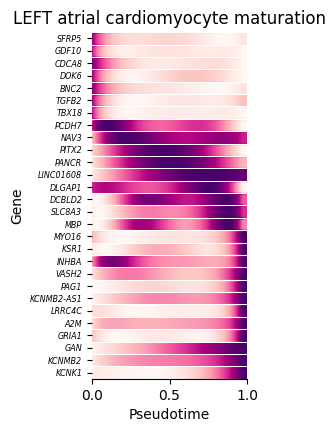

Fitting expression...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 17.55it/s]


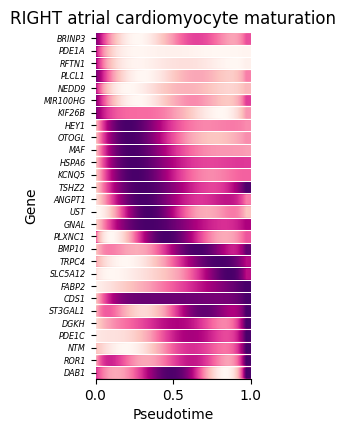

Fitting expression...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 15.48it/s]


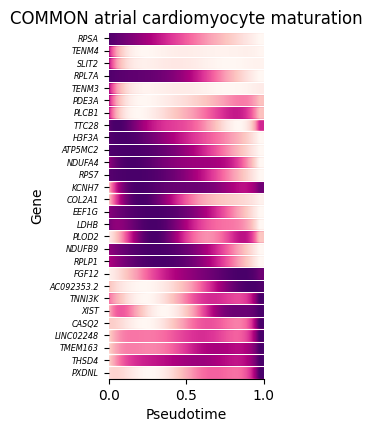

In [53]:
figsize=(2,4.5)
top_n_features=28
file_extension=".png"
file_extension=".svg"

plot_fitted_expression(adata_gex[adata_gex.obs.fine_grain=="AtrialCardiomyocytesLeft"], gene_list=associated_features_dict["genes_LEFT"][:top_n_features], title="LEFT atrial cardiomyocyte maturation", figsize=figsize, show_colorbar=False,fname=f"genes_LEFT{file_extension}")
plot_fitted_expression(adata_gex[adata_gex.obs.fine_grain=="AtrialCardiomyocytesRight"], gene_list=associated_features_dict["genes_RIGHT"][:top_n_features], title="RIGHT atrial cardiomyocyte maturation", figsize=figsize, show_colorbar=False,fname=f"genes_RIGHT{file_extension}")

#top_n_features=80
#figsize=(2,10)

plot_fitted_expression(adata_gex, gene_list=associated_features_dict["genes_COMMON"][:top_n_features], title="COMMON atrial cardiomyocyte maturation", figsize=figsize, show_colorbar=False,fname=f"genes_COMMON{file_extension}")

In [54]:
gene_list=associated_features_dict["genes_LEFT"]
adata_subset=adata_gex[adata_gex.obs.fine_grain=="AtrialCardiomyocytesLeft"].copy()
distance_threshold=4.5

Creating clustermap for 28 features across 500 bins


Fitting expression...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:02<00:00, 10.55it/s]


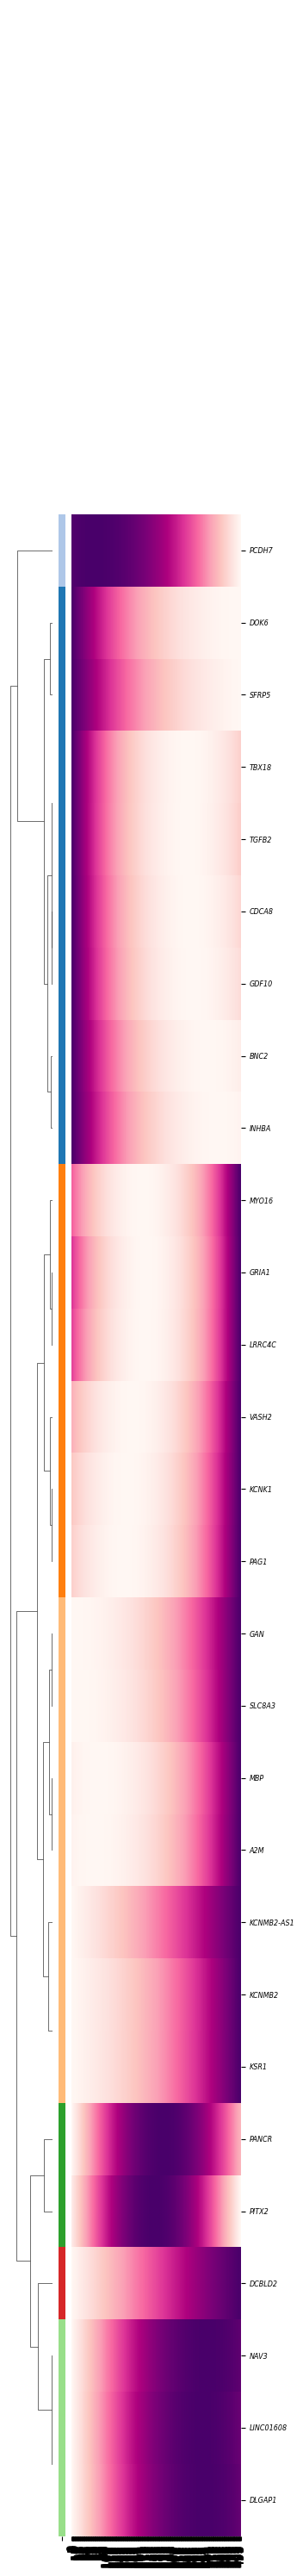

cluster_3: 7 genes
cluster_2: 6 genes
cluster_4: 2 genes
cluster_6: 1 genes
cluster_0: 8 genes
cluster_5: 3 genes
cluster_1: 1 genes


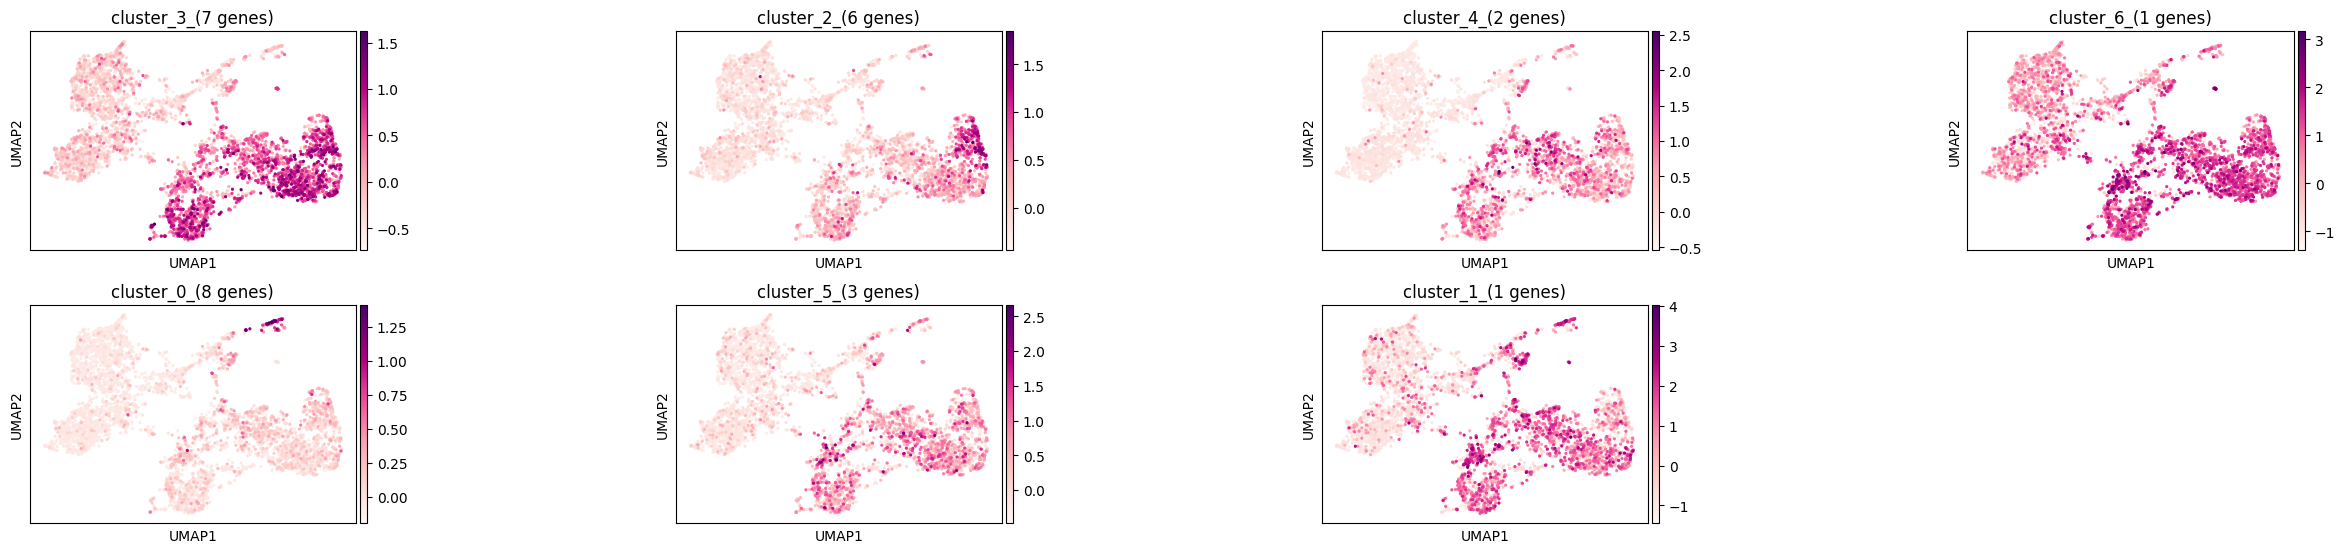

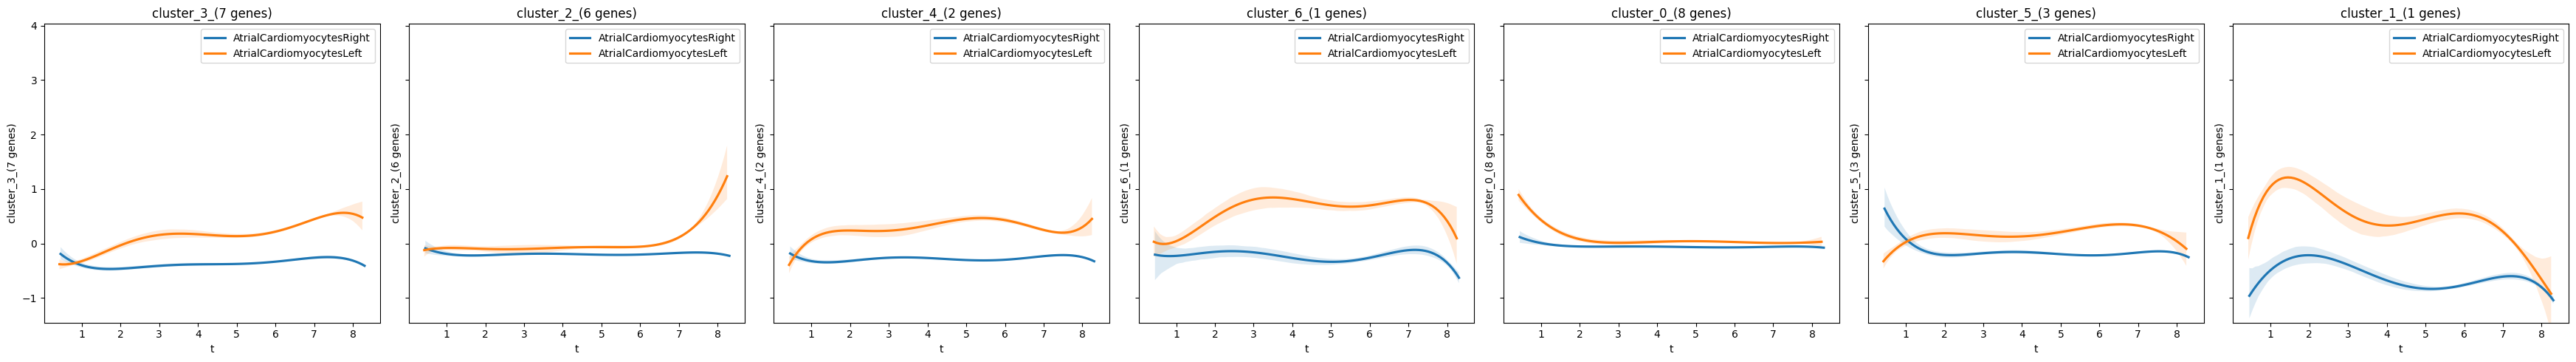

In [55]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
from tqdm import tqdm
import matplotlib.pyplot as plt

def create_clustermap(adata, gene_list, n_bins, figsize, desired_n_clusters):
    """
    Creates a clustermap of fitted gene expression across pseudotime bins for a list of genes.

    Parameters:
    adata (AnnData): Annotated data matrix.
    gene_list (list): List of genes to be included.
    n_bins (int): Number of bins to divide pseudotime into.
    figsize (tuple): Figure size in the format (width, height).
    """
    # Normalize and reshape pseudotime
    pseudotime = adata.obs["t"].values
    pseudotime_min = min(pseudotime)
    pseudotime_max = max(pseudotime)
    pseudotime_normalized = (pseudotime - pseudotime_min) / (pseudotime_max - pseudotime_min)
    pseudotime_reshaped = pseudotime_normalized.reshape(-1, 1)

    # Create pseudotime bins
    bins = np.linspace(0, 1, n_bins + 1)
    pseudotime_binned = np.digitize(pseudotime_normalized, bins) - 1

    # DataFrame to store fitted expressions
    expression_data = pd.DataFrame(index=gene_list, columns=range(n_bins))

    print(f"Creating clustermap for {len(gene_list)} features across {n_bins} bins")

    for gene in tqdm(gene_list, desc="Fitting expression..."):
        gene_expression = adata[:, gene].X.toarray()

        # Check if gene_expression is empty or almost empty
        if gene_expression.size == 0 or np.count_nonzero(gene_expression) < 5:
            print(f"Insufficient data for gene: {gene}")
            continue

        # Fit the model
        model = make_pipeline(PolynomialFeatures(2), LinearRegression())
        model.fit(pseudotime_reshaped, gene_expression)

        # Predict expression for each bin
        for i in range(n_bins):
            bin_range = np.linspace(bins[i], bins[i + 1], 10).reshape(-1, 1)
            predicted_expression = model.predict(bin_range).mean()
            expression_data.loc[gene, i] = predicted_expression  # Direct assignment
    
    expression_data = expression_data.astype(float).fillna(0)

    # Perform min-max normalization
    scaler = MinMaxScaler()
    expression_data_normalized = pd.DataFrame(scaler.fit_transform(expression_data.T).T, index=gene_list, columns=expression_data.columns) # row-wise (per gene) min-max normalisation


    # Compute the distance matrix for the rows (genes) and then the linkage matrix
    distance_matrix = pdist(expression_data_normalized)
    row_linkage = linkage(distance_matrix, method='average')

    # Define clusters using the row linkage
    clusters = fcluster(row_linkage, desired_n_clusters, criterion='maxclust')

    # Define clusters using a distance threshold
    clusters = fcluster(row_linkage, distance_threshold, criterion='distance')

    # Generate a color palette with seaborn and map cluster labels to colors
    cluster_colors = sns.color_palette("tab20", n_colors=len(np.unique(clusters)))
    row_colors = pd.Series(clusters, index=gene_list).map(dict(zip(np.unique(clusters), cluster_colors)))

    # Create clustermap with row colors
    g = sns.clustermap(expression_data_normalized, row_linkage=row_linkage, figsize=figsize, cmap='RdPu', yticklabels=True, xticklabels=True, col_cluster=False, row_colors=row_colors)
    g.cax.set_visible(False)
    
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize='xx-small', fontstyle='italic')
    plt.show()

    return row_linkage, clusters

row_linkage, clusters = create_clustermap(adata=adata_subset, gene_list=gene_list, n_bins=500, figsize=(4,30), desired_n_clusters=3)




from collections import defaultdict

def create_cluster_dict(clusters, gene_list):
    """
    Creates a dictionary mapping cluster names to lists of genes, adjusting for zero-based indexing.

    Parameters:
    clusters (array): Array of cluster assignments for each gene.
    gene_list (list): List of genes corresponding to the clusters.

    Returns:
    dict: Dictionary with cluster names as keys and lists of genes as values.
    """
    cluster_dict = defaultdict(list)
    for gene, cluster in zip(gene_list, clusters):
        #print(f"Gene: {gene}, Cluster: {cluster}")  # Diagnostic print
        cluster_name=f"cluster_{cluster - 1}"
        cluster_dict[cluster_name].append(gene)

    return dict(cluster_dict)

# Example usage
cluster_dict = create_cluster_dict(clusters, gene_list=gene_list)

# Check the clusters and the number of genes in each
for cluster, genes in cluster_dict.items():
    print(f"{cluster}: {len(genes)} genes")

cluster_dict.keys()
scores=[]
for cluster_name,cluster_genes in cluster_dict.items():
    score_name=f"{cluster_name}_({len(cluster_genes)} genes)"
    scores.append(score_name)
    sc.tl.score_genes(adata_gex,gene_list=cluster_genes,score_name=f"{score_name}")

sc.pl.umap(adata_gex, color=scores, ncols=4, wspace=0.8, cmap="RdPu")








import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

optimal_orders = {}

for score in scores:
    # Prepare the data
    tmp_df = adata_gex.obs[["t", score]]
    X = tmp_df["t"].values.reshape(-1, 1)
    y = tmp_df[score].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_order = 1
    best_mse = float('inf')

    # Test different polynomial orders
    for order in range(1, 6):
        model = make_pipeline(PolynomialFeatures(order), LinearRegression())
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)

        if mse < best_mse:
            best_mse = mse
            best_order = order

    optimal_orders[score] = best_order






import matplotlib.pyplot as plt
import seaborn as sns

# Number of scores (subplots)
num_scores = len(scores)

# Create a figure with a row of subplots
fig, axes = plt.subplots(1, num_scores, figsize=(5 * num_scores, 5), sharey=True)

# Track the global min and max for the y-axis
global_min, global_max = float('inf'), float('-inf')

# Plot each score
for i, score in enumerate(scores):
    # Prepare the data
    tmp_df = adata_gex.obs[["t", score, "fine_grain"]]
    
    # Plot for each fine_grain category
    fine_grain_categories = tmp_df["fine_grain"].unique()
    for category in fine_grain_categories:
        category_data = tmp_df[tmp_df["fine_grain"] == category]
        sns.regplot(ax=axes[i], data=category_data, x="t", y=score, order=optimal_orders[score], scatter=False, label=category)
    
    # Set the title and add legend
    axes[i].set_title(score)
    axes[i].legend()

    # Update global min and max
    current_min, current_max = tmp_df[score].min(), tmp_df[score].max()
    global_min, global_max = min(global_min, current_min), max(global_max, current_max)

# Set the same y-axis limits for all subplots
for ax in axes:
    ax.set_ylim(global_min, global_max)

# Adjust layout
plt.tight_layout()
plt.show()


In [56]:
cluster_dict["cluster_3"]

['MBP', 'KCNMB2', 'GAN', 'SLC8A3', 'A2M', 'KCNMB2-AS1', 'KSR1']

In [57]:
gene_set_A=cluster_dict["cluster_3"]+cluster_dict["cluster_4"]+cluster_dict["cluster_6"]
gene_set_A

['MBP',
 'KCNMB2',
 'GAN',
 'SLC8A3',
 'A2M',
 'KCNMB2-AS1',
 'KSR1',
 'PANCR',
 'PITX2',
 'DCBLD2']

In [58]:
gene_list=associated_features_dict["genes_RIGHT"]
adata_subset=adata_gex[adata_gex.obs.fine_grain=="AtrialCardiomyocytesRight"].copy()
distance_threshold=4.5

Creating clustermap for 29 features across 500 bins


Fitting expression...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 10.81it/s]


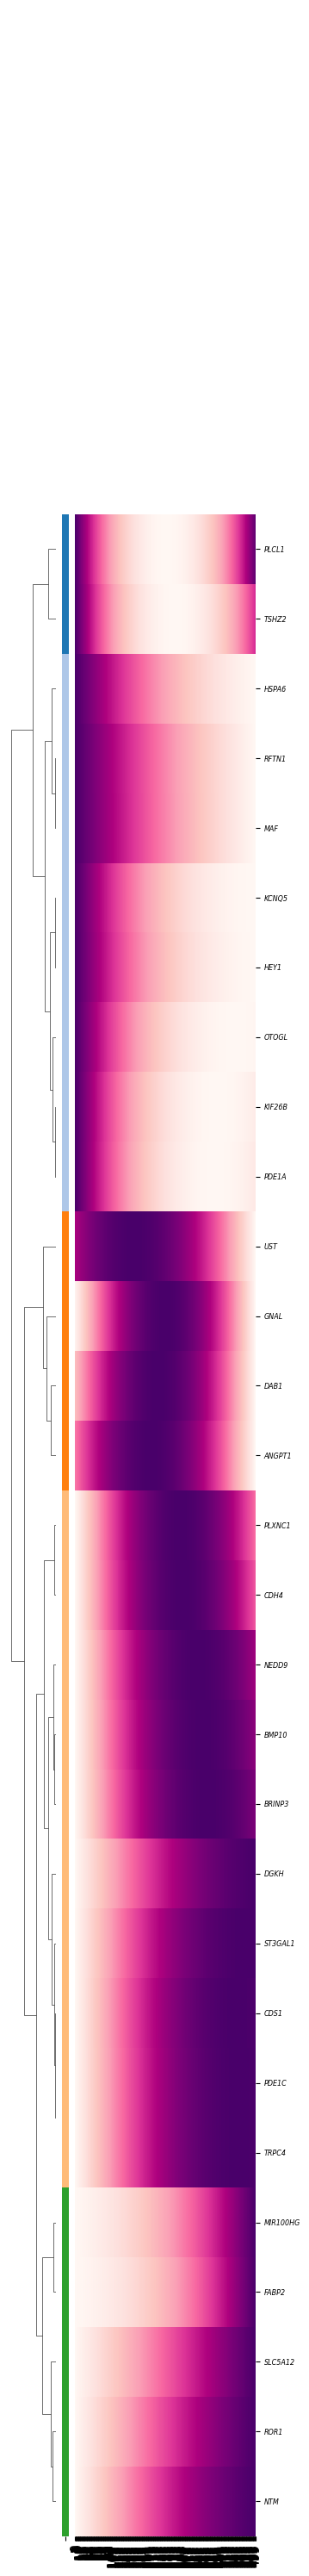

cluster_1: 8 genes
cluster_4: 5 genes
cluster_2: 4 genes
cluster_3: 10 genes
cluster_0: 2 genes


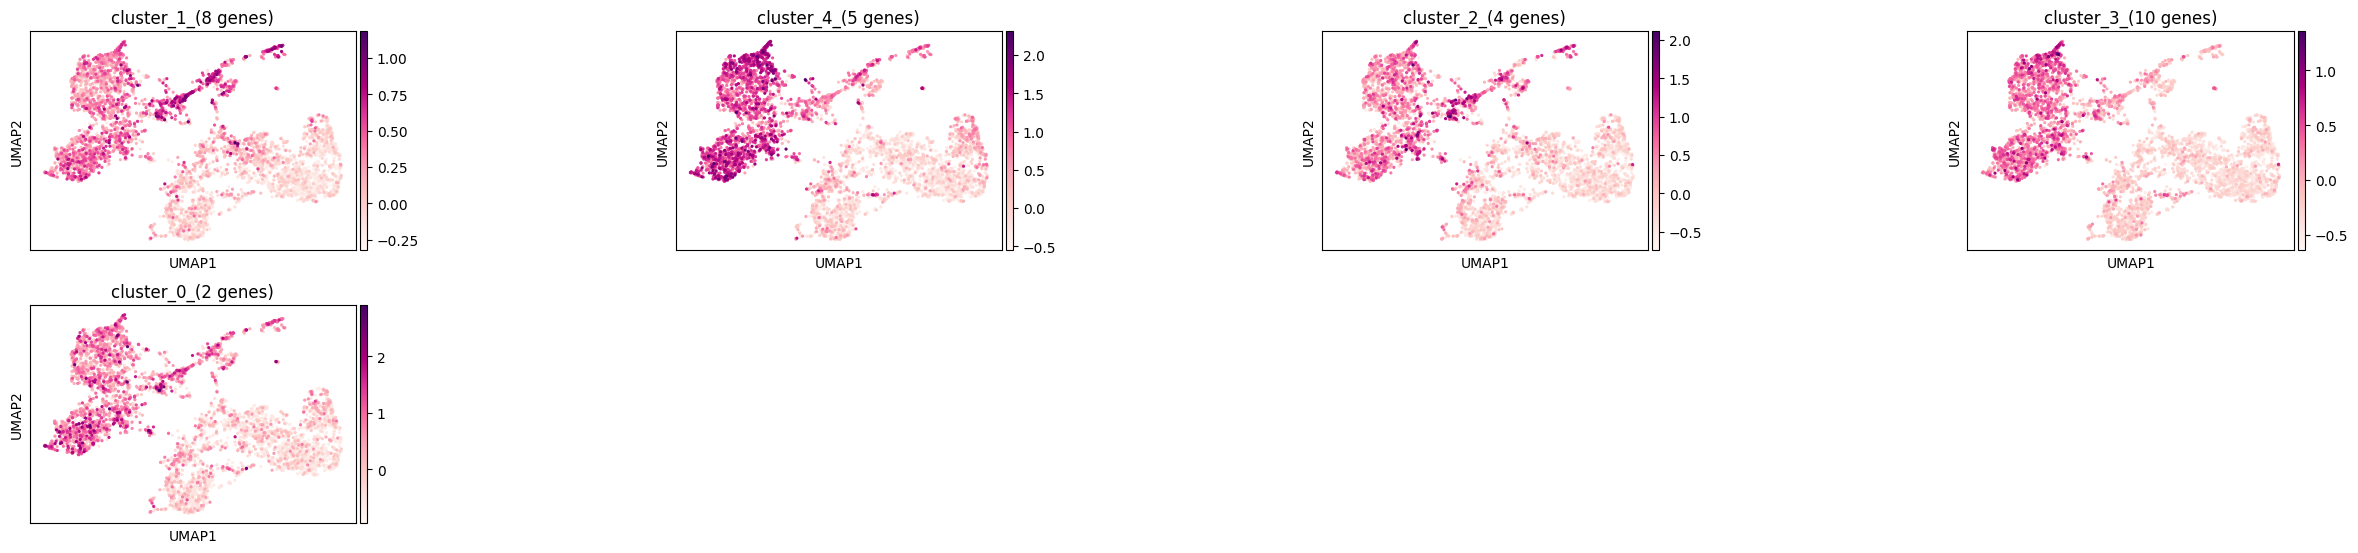

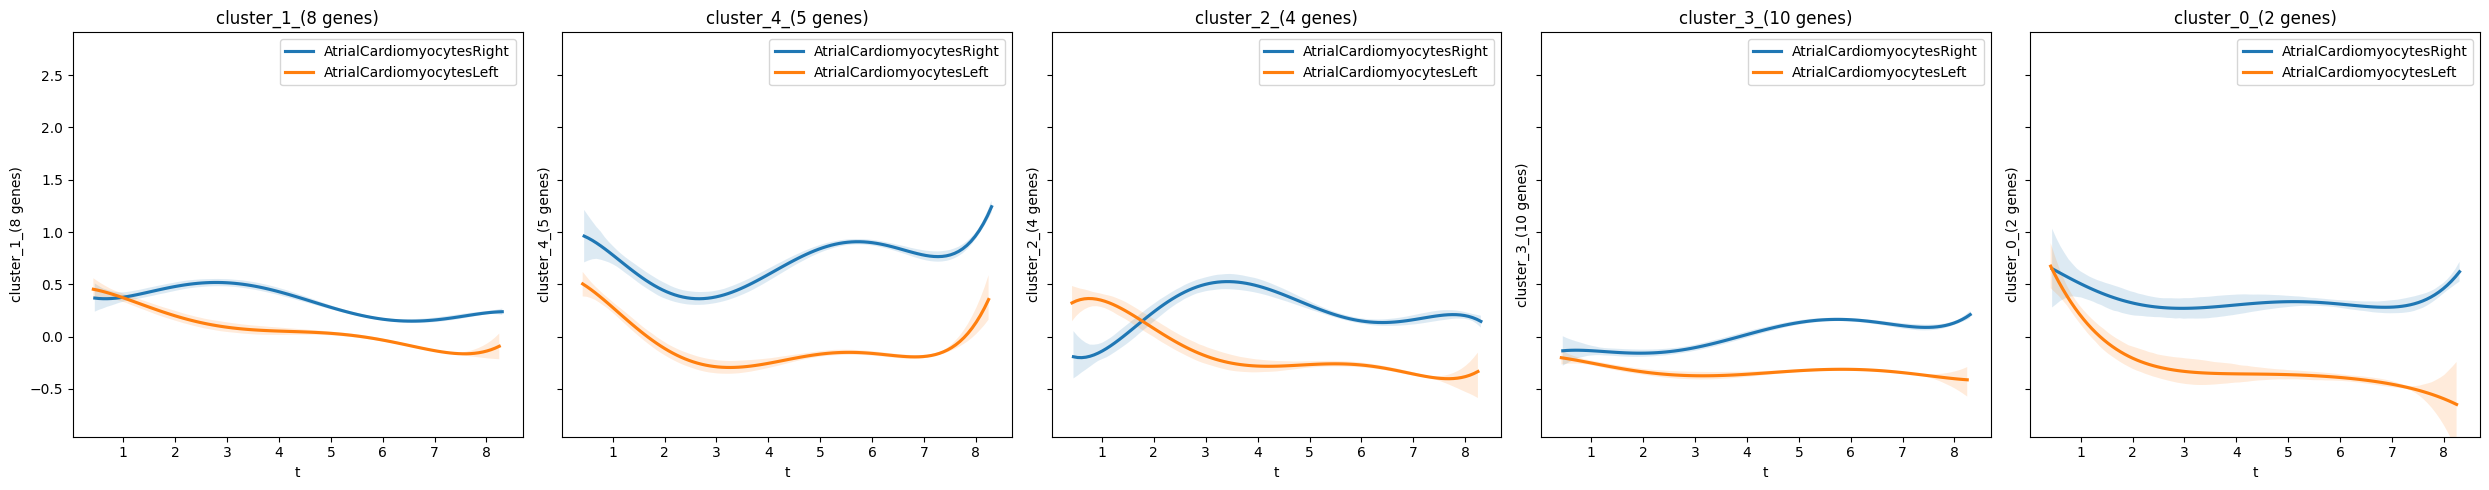

In [59]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
from tqdm import tqdm
import matplotlib.pyplot as plt

def create_clustermap(adata, gene_list, n_bins, figsize, desired_n_clusters):
    """
    Creates a clustermap of fitted gene expression across pseudotime bins for a list of genes.

    Parameters:
    adata (AnnData): Annotated data matrix.
    gene_list (list): List of genes to be included.
    n_bins (int): Number of bins to divide pseudotime into.
    figsize (tuple): Figure size in the format (width, height).
    """
    # Normalize and reshape pseudotime
    pseudotime = adata.obs["t"].values
    pseudotime_min = min(pseudotime)
    pseudotime_max = max(pseudotime)
    pseudotime_normalized = (pseudotime - pseudotime_min) / (pseudotime_max - pseudotime_min)
    pseudotime_reshaped = pseudotime_normalized.reshape(-1, 1)

    # Create pseudotime bins
    bins = np.linspace(0, 1, n_bins + 1)
    pseudotime_binned = np.digitize(pseudotime_normalized, bins) - 1

    # DataFrame to store fitted expressions
    expression_data = pd.DataFrame(index=gene_list, columns=range(n_bins))

    print(f"Creating clustermap for {len(gene_list)} features across {n_bins} bins")

    for gene in tqdm(gene_list, desc="Fitting expression..."):
        gene_expression = adata[:, gene].X.toarray()

        # Check if gene_expression is empty or almost empty
        if gene_expression.size == 0 or np.count_nonzero(gene_expression) < 5:
            print(f"Insufficient data for gene: {gene}")
            continue

        # Fit the model
        model = make_pipeline(PolynomialFeatures(2), LinearRegression())
        model.fit(pseudotime_reshaped, gene_expression)

        # Predict expression for each bin
        for i in range(n_bins):
            bin_range = np.linspace(bins[i], bins[i + 1], 10).reshape(-1, 1)
            predicted_expression = model.predict(bin_range).mean()
            expression_data.loc[gene, i] = predicted_expression  # Direct assignment
    
    expression_data = expression_data.astype(float).fillna(0)

    # Perform min-max normalization
    scaler = MinMaxScaler()
    expression_data_normalized = pd.DataFrame(scaler.fit_transform(expression_data.T).T, index=gene_list, columns=expression_data.columns) # row-wise (per gene) min-max normalisation


    # Compute the distance matrix for the rows (genes) and then the linkage matrix
    distance_matrix = pdist(expression_data_normalized)
    row_linkage = linkage(distance_matrix, method='average')

    # Define clusters using the row linkage
    clusters = fcluster(row_linkage, desired_n_clusters, criterion='maxclust')

    # Define clusters using a distance threshold
    clusters = fcluster(row_linkage, distance_threshold, criterion='distance')

    # Generate a color palette with seaborn and map cluster labels to colors
    cluster_colors = sns.color_palette("tab20", n_colors=len(np.unique(clusters)))
    row_colors = pd.Series(clusters, index=gene_list).map(dict(zip(np.unique(clusters), cluster_colors)))

    # Create clustermap with row colors
    g = sns.clustermap(expression_data_normalized, row_linkage=row_linkage, figsize=figsize, cmap='RdPu', yticklabels=True, xticklabels=True, col_cluster=False, row_colors=row_colors)
    g.cax.set_visible(False)
    
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize='xx-small', fontstyle='italic')
    plt.show()

    return row_linkage, clusters

row_linkage, clusters = create_clustermap(adata=adata_subset, gene_list=gene_list, n_bins=500, figsize=(4,30), desired_n_clusters=3)




from collections import defaultdict

def create_cluster_dict(clusters, gene_list):
    """
    Creates a dictionary mapping cluster names to lists of genes, adjusting for zero-based indexing.

    Parameters:
    clusters (array): Array of cluster assignments for each gene.
    gene_list (list): List of genes corresponding to the clusters.

    Returns:
    dict: Dictionary with cluster names as keys and lists of genes as values.
    """
    cluster_dict = defaultdict(list)
    for gene, cluster in zip(gene_list, clusters):
        #print(f"Gene: {gene}, Cluster: {cluster}")  # Diagnostic print
        cluster_name=f"cluster_{cluster - 1}"
        cluster_dict[cluster_name].append(gene)

    return dict(cluster_dict)

# Example usage
cluster_dict = create_cluster_dict(clusters, gene_list=gene_list)

# Check the clusters and the number of genes in each
for cluster, genes in cluster_dict.items():
    print(f"{cluster}: {len(genes)} genes")

cluster_dict.keys()
scores=[]
for cluster_name,cluster_genes in cluster_dict.items():
    score_name=f"{cluster_name}_({len(cluster_genes)} genes)"
    scores.append(score_name)
    sc.tl.score_genes(adata_gex,gene_list=cluster_genes,score_name=f"{score_name}")

sc.pl.umap(adata_gex, color=scores, ncols=4, wspace=0.8, cmap="RdPu")








import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

optimal_orders = {}

for score in scores:
    # Prepare the data
    tmp_df = adata_gex.obs[["t", score]]
    X = tmp_df["t"].values.reshape(-1, 1)
    y = tmp_df[score].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_order = 1
    best_mse = float('inf')

    # Test different polynomial orders
    for order in range(1, 6):
        model = make_pipeline(PolynomialFeatures(order), LinearRegression())
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)

        if mse < best_mse:
            best_mse = mse
            best_order = order

    optimal_orders[score] = best_order






import matplotlib.pyplot as plt
import seaborn as sns

# Number of scores (subplots)
num_scores = len(scores)

# Create a figure with a row of subplots
fig, axes = plt.subplots(1, num_scores, figsize=(5 * num_scores, 5), sharey=True)

# Track the global min and max for the y-axis
global_min, global_max = float('inf'), float('-inf')

# Plot each score
for i, score in enumerate(scores):
    # Prepare the data
    tmp_df = adata_gex.obs[["t", score, "fine_grain"]]
    
    # Plot for each fine_grain category
    fine_grain_categories = tmp_df["fine_grain"].unique()
    for category in fine_grain_categories:
        category_data = tmp_df[tmp_df["fine_grain"] == category]
        sns.regplot(ax=axes[i], data=category_data, x="t", y=score, order=optimal_orders[score], scatter=False, label=category)
    
    # Set the title and add legend
    axes[i].set_title(score)
    axes[i].legend()

    # Update global min and max
    current_min, current_max = tmp_df[score].min(), tmp_df[score].max()
    global_min, global_max = min(global_min, current_min), max(global_max, current_max)

# Set the same y-axis limits for all subplots
for ax in axes:
    ax.set_ylim(global_min, global_max)

# Adjust layout
plt.tight_layout()
plt.show()


In [60]:
gene_set_B=cluster_dict["cluster_2"]+cluster_dict["cluster_1"]
gene_set_B

['DAB1',
 'UST',
 'ANGPT1',
 'GNAL',
 'KIF26B',
 'KCNQ5',
 'HEY1',
 'HSPA6',
 'RFTN1',
 'MAF',
 'OTOGL',
 'PDE1A']

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


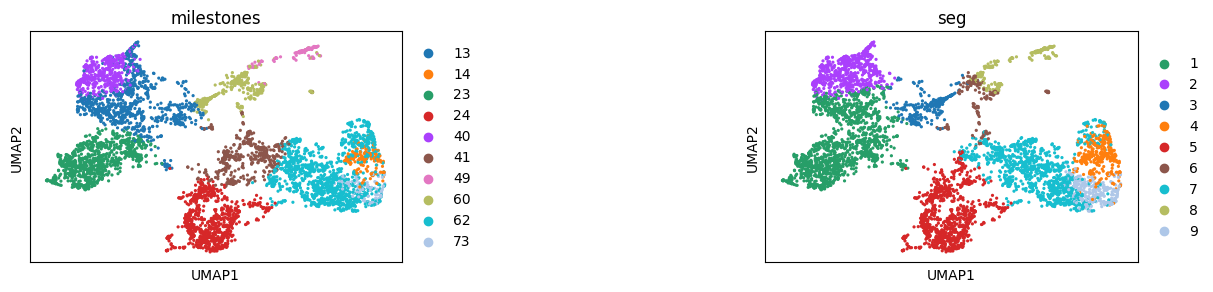

In [61]:
sc.pl.umap(adata_gex, color=["milestones","seg"], ncols=4, wspace=0.8)

In [62]:
import pandas as pd

# Assuming adata_gex is your AnnData object containing scRNAseq data
# and it has 't' and 'milestones' in adata_gex.obs

# Filter the rows where 'milestones' is '60'
filtered_data = adata_gex.obs[adata_gex.obs['milestones'] == '60']

# Find the maximum 't' value in this filtered group
bifurcation_point = filtered_data['t'].median()

# Output the bifurcation point
print("Bifurcation Point:", bifurcation_point)


Bifurcation Point: 1.9802904538320618


/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


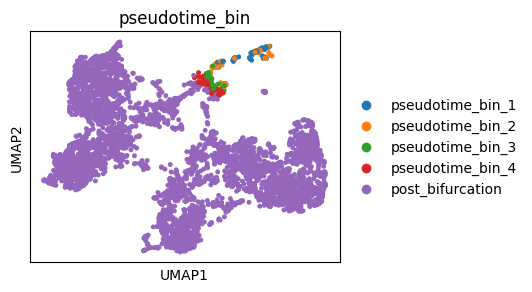

In [63]:
import numpy as np
import pandas as pd

# Assuming adata_gex is your AnnData object containing scRNAseq data
# and bifurcation_point is already defined as shown previously

# Define the number of bins you want
X = 4  # Adjust this value as needed

# Get the minimum 't' value from adata_gex
min_t_value = adata_gex.obs['t'].min()

# Create bins between the minimum 't' value and the bifurcation point
bins = np.linspace(min_t_value, bifurcation_point, X + 1)  # X+1 because we need X bins

# Assign each cell to a pseudotime bin or "post_bifurcation"
adata_gex.obs['pseudotime_bin'] = pd.cut(adata_gex.obs['t'], bins=bins, include_lowest=True, 
                                         labels=[f'pseudotime_bin_{i}' for i in range(1, X + 1)])
adata_gex.obs['pseudotime_bin'] = adata_gex.obs['pseudotime_bin'].cat.add_categories('post_bifurcation')
adata_gex.obs.loc[adata_gex.obs['t'] > bifurcation_point, 'pseudotime_bin'] = 'post_bifurcation'

# You can now work with the 'pseudotime_bin' column in adata_gex.obs for further analysis
sc.pl.umap(adata_gex, color=["pseudotime_bin"], ncols=1, wspace=0.8, size=50)

In [64]:
adata_gex.obs.fine_grain.value_counts()

AtrialCardiomyocytesLeft     3041
AtrialCardiomyocytesRight    2623
Name: fine_grain, dtype: int64

AtrialCardiomyocytesLeft        2828
AtrialCardiomyocytesRight       2509
AtrialCardiomyocytesImmature     327
Name: AtrialCardiomyocytesImmature_annotation, dtype: int64
saving annotation for use with c2l...


/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


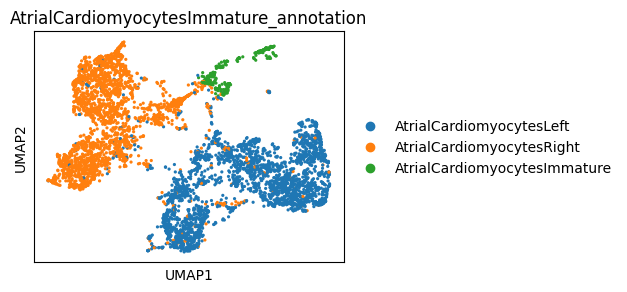

In [65]:
# Step 1: Copy values from 'fine_grain' to the new column
adata_gex.obs['AtrialCardiomyocytesImmature_annotation'] = adata_gex.obs['fine_grain']

# Add new category to the column
new_category = "AtrialCardiomyocytesImmature"
if new_category not in adata_gex.obs['AtrialCardiomyocytesImmature_annotation'].cat.categories:
    adata_gex.obs['AtrialCardiomyocytesImmature_annotation'] = adata_gex.obs['AtrialCardiomyocytesImmature_annotation'].cat.add_categories(new_category)

# Step 2: Modify values for cells not equal to "post_bifurcation" in 'pseudotime_bin'
adata_gex.obs.loc[adata_gex.obs['pseudotime_bin'] != 'post_bifurcation', 'AtrialCardiomyocytesImmature_annotation'] = new_category

# Verify the value counts
print(adata_gex.obs['AtrialCardiomyocytesImmature_annotation'].value_counts())
print("saving annotation for use with c2l...")
adata_gex.obs['AtrialCardiomyocytesImmature_annotation'].to_csv("AtrialCardiomyocytesImmature_annotation.csv")
sc.pl.umap(adata_gex,color="AtrialCardiomyocytesImmature_annotation")

In [66]:
adata_gex.X=adata_gex.layers["counts"].copy()
sc.pp.normalize_total(adata_gex, target_sum=1e4)
sc.pp.log1p(adata_gex)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 18.84it/s]
/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
  0%|                                                                                                                                                                                                                    | 0/22 [00:00<?, ?it/s]/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
100%|█

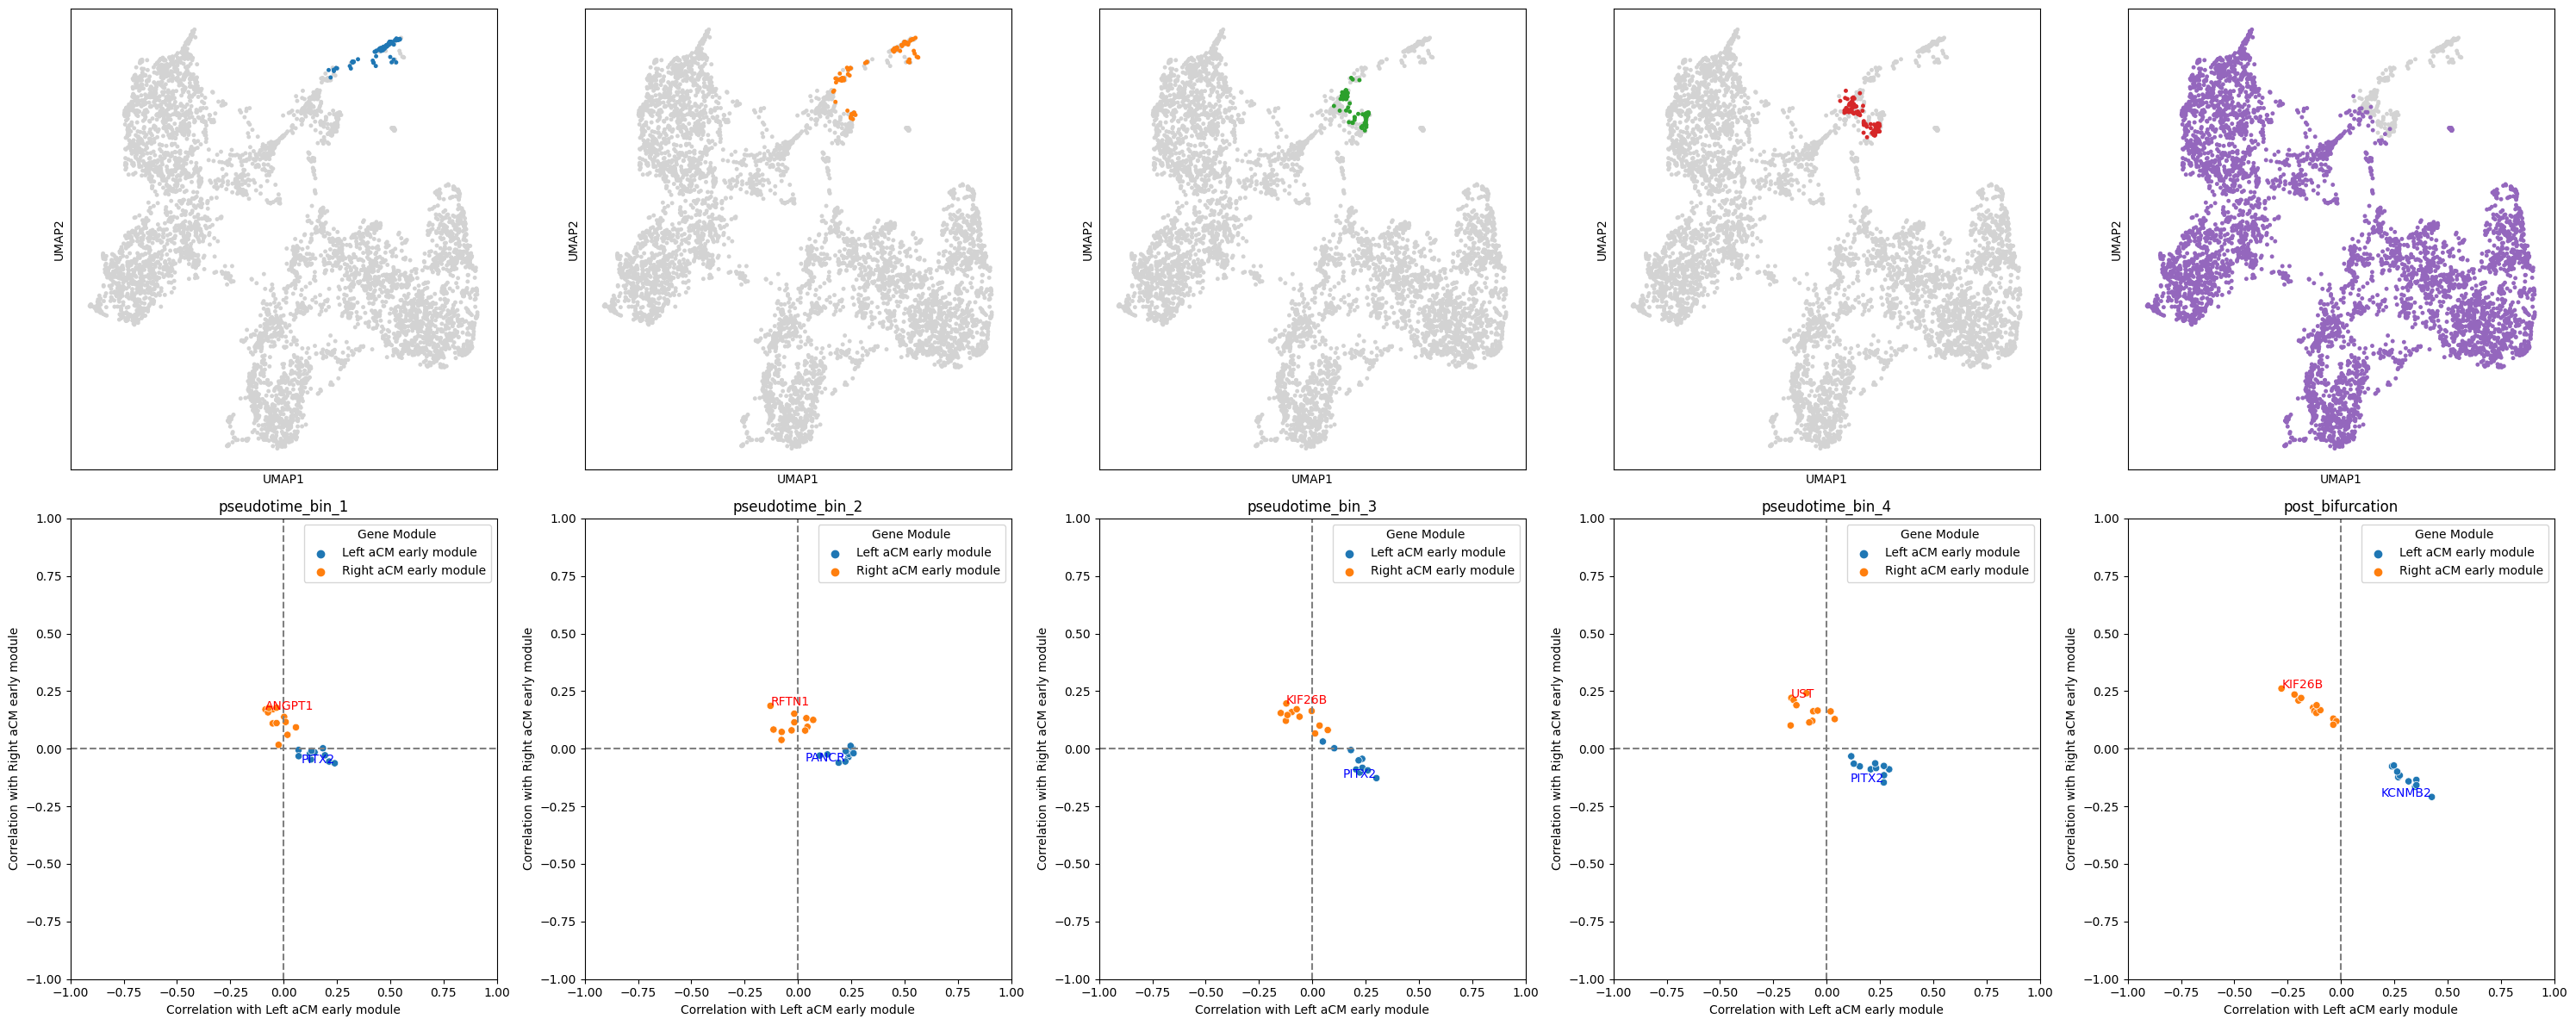

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats
from scipy.sparse import issparse
from tqdm import tqdm
import scanpy as sc
import numpy as np

# Function to calculate the correlation matrix and scatter plot data
def calculate_correlation(bin_cells, gene_set_A, gene_set_B, gene_indices):
    combined_gene_set = gene_set_A + gene_set_B
    # Initialize an empty DataFrame for the correlation matrix
    correlation_matrix = pd.DataFrame(index=combined_gene_set, columns=combined_gene_set)
    scatter_data = []

    # Calculate correlations for each pair of genes
    for gene1 in tqdm(combined_gene_set):
        for gene2 in combined_gene_set:
            # Extract expression values for gene1 and gene2
            x_values = bin_cells.X[:, gene_indices[gene1]].toarray().flatten() if issparse(bin_cells.X) else bin_cells.X[:, gene_indices[gene1]].flatten()
            y_values = bin_cells.X[:, gene_indices[gene2]].toarray().flatten() if issparse(bin_cells.X) else bin_cells.X[:, gene_indices[gene2]].flatten()

            # Calculate Pearson correlation
            correlation, _ = scipy.stats.pearsonr(x_values, y_values)

            # Store the correlation in the matrix
            correlation_matrix.at[gene1, gene2] = correlation

    # Calculate mean correlation for each gene with gene_set_A and gene_set_B
    for gene in combined_gene_set:
        mean_corr_with_A = correlation_matrix.loc[gene, gene_set_A].mean()
        mean_corr_with_B = correlation_matrix.loc[gene, gene_set_B].mean()
        gene_set_label = 'Left aCM early module' if gene in gene_set_A else 'Right aCM early module'

        scatter_data.append({'gene': gene, 'mean_corr_with_A': mean_corr_with_A, 'mean_corr_with_B': mean_corr_with_B, 'gene_set': gene_set_label})

    scatter_df = pd.DataFrame(scatter_data)

    return scatter_df

# Function to add labels to the genes closest to the bottom right and top left of each scatter plot
def label_extreme_genes(scatter_df, ax):
    # Define bottom right and top left points
    bottom_right_point = (1, -1)
    top_left_point = (-1, 1)

    # Function to calculate Euclidean distance
    def euclidean_distance(point1, point2):
        return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

    # Find the gene closest to the bottom right
    scatter_df['distance_to_bottom_right'] = scatter_df.apply(lambda row: euclidean_distance((row['mean_corr_with_A'], row['mean_corr_with_B']), bottom_right_point), axis=1)
    bottom_right_gene = scatter_df.loc[scatter_df['distance_to_bottom_right'].idxmin()]

    # Find the gene closest to the top left
    scatter_df['distance_to_top_left'] = scatter_df.apply(lambda row: euclidean_distance((row['mean_corr_with_A'], row['mean_corr_with_B']), top_left_point), axis=1)
    top_left_gene = scatter_df.loc[scatter_df['distance_to_top_left'].idxmin()]

    # Add labels to the plot
    ax.text(bottom_right_gene['mean_corr_with_A'], bottom_right_gene['mean_corr_with_B'], bottom_right_gene['gene'], color='blue', ha='right')
    ax.text(top_left_gene['mean_corr_with_A'], top_left_gene['mean_corr_with_B'], top_left_gene['gene'], color='red', ha='left')

# Assuming gene_set_A and gene_set_B are lists of gene names
# Assuming adata_gex is your AnnData object containing scRNAseq data
gene_indices = {gene: adata_gex.var.index.get_loc(gene) for gene in set(gene_set_A + gene_set_B)}

# Get all unique categories from 'pseudotime_bin' and move 'post_bifurcation' to the end
bin_categories = [cat for cat in adata_gex.obs['pseudotime_bin'].cat.categories if cat != 'post_bifurcation']
bin_categories.append('post_bifurcation')

# Number of bins to create subplots for
num_bins = len(adata_gex.obs['pseudotime_bin'].cat.categories)

# Create a figure with two rows of subplots: one for UMAP and one for scatter plots
fig, axes = plt.subplots(2, num_bins, figsize=(6 * num_bins, 12))

# Loop over each pseudotime bin to create UMAP and scatter plots
for i, bin_label in enumerate(adata_gex.obs['pseudotime_bin'].cat.categories):
    # Skip the post_bifurcation bin if needed
    #if bin_label == 'post_bifurcation':
    #    continue

    # Filter cells in the current bin for scatter plot
    bin_cells = adata_gex[adata_gex.obs['pseudotime_bin'] == bin_label]

    # Calculate scatter plot data
    scatter_df = calculate_correlation(bin_cells, gene_set_A, gene_set_B, gene_indices)

    # Create UMAP plot in the first row
    ax_umap = axes[0, i]
    sc.pl.umap(adata_gex, color="pseudotime_bin", groups=[bin_label], ax=ax_umap, show=False, legend_loc=None, title="", size=50)

    # Create specific scatter plot in the second row
    ax_scatter = axes[1, i]
    sns.scatterplot(data=scatter_df, x='mean_corr_with_A', y='mean_corr_with_B', hue='gene_set', ax=ax_scatter)
    ax_scatter.set_title(f'{bin_label}')
    ax_scatter.axhline(0, color='grey', linestyle='--')
    ax_scatter.axvline(0, color='grey', linestyle='--')
    ax_scatter.set_xlabel('Correlation with Left aCM early module')
    ax_scatter.set_ylabel('Correlation with Right aCM early module')
    ax_scatter.set_xlim(-1, 1)
    ax_scatter.set_ylim(-1, 1)
    ax_scatter.legend(title='Gene Module')

    # Label the extreme genes
    label_extreme_genes(scatter_df, ax_scatter)

plt.tight_layout()
plt.show()


In [68]:
early_modules_dict={}
early_modules_dict["LEFT"]=gene_set_A
early_modules_dict["RIGHT"]=gene_set_B

In [69]:
import pickle

key="aCM_n570" # or (aCM_n1140 or aCM_full)
key="aCM_n1140"
key="aCM_full"
target_type="Gene"
# File path
file_path = f"/nfs/team205/heart/pyscenic/plus/eRegulon_signatures/{key}_{target_type}_eRegulon_signatures.pkl"

# Open the file and load the dictionary
with open(file_path, 'rb') as file:
    TF_TG_dict = pickle.load(file)

In [70]:
results_list=[]

In [71]:
side="LEFT"
associated_features_dict.keys()
total_transcriptome_genes=36000
genes_of_interest=early_modules_dict[f"{side}"]

import pandas as pd
from scipy.stats import fisher_exact


# Initialize a list to store the results
results = []

for regulon, regulon_genes in TF_TG_dict.items():
    # Contingency table
    overlap = len(set(regulon_genes) & set(genes_of_interest))
    only_genes_of_interest = len(genes_of_interest) - overlap
    only_regulon_genes = len(regulon_genes) - overlap
    neither = total_transcriptome_genes - (overlap + only_genes_of_interest + only_regulon_genes)
    table = [[overlap, only_genes_of_interest], [only_regulon_genes, neither]]

    # Perform Fisher's Exact Test
    odds_ratio, p_value = fisher_exact(table)
    
    # Append the results
    results.append({"Regulon": regulon, "Odds Ratio": odds_ratio, "pval": p_value})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by p-value
results_df.sort_values(by="pval", inplace=True)

# Reset index after sorting
results_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
results_df=results_df[results_df.pval<0.01]
results_df["side"]=side
results_df=results_df.reset_index(names='rank')
results_list.append(results_df)
results_df

rank                  Regulon  Odds Ratio          pval  side
0      0           PITX2_+_(130g)  286.920000  1.411346e-10  LEFT
1      1           TEAD1_+_(179g)  205.839080  7.096468e-10  LEFT
2      2           GATA4_+_(535g)   66.905660  1.685954e-07  LEFT
3      3         GTF2IRD1_+_(73g)  219.918367  9.501400e-07  LEFT
4      4             ETV6_+_(27g)  359.650000  2.428555e-05  LEFT
5      5          POU2F1_+_(430g)   35.693878  1.907918e-04  LEFT
6      6            GATA5_+_(93g)   98.623626  2.931123e-04  LEFT
7      7          MEF2A_+_(1360g)   17.027532  3.546848e-04  LEFT
8      8           NCOA1_+_(170g)   53.306548  9.730669e-04  LEFT
9      9           SMAD3_+_(275g)   32.707875  2.512642e-03  LEFT
10    10          KLF12_+_(1164g)   12.856774  3.411766e-03  LEFT
11    11  HMG20B_extended_+_(15g)  285.523810  4.159382e-03  LEFT
12    12             MAFF_+_(17g)  249.819444  4.712788e-03  LEFT
13    13             RFX2_+_(17g)  249.819444  4.712788e-03  LEFT
14    14            ZNF26_+_(31g)  133.185185  8.578888e-03  LEFT

In [72]:
side="RIGHT"
associated_features_dict.keys()
total_transcriptome_genes=36000
genes_of_interest=early_modules_dict[f"{side}"]

import pandas as pd
from scipy.stats import fisher_exact


# Initialize a list to store the results
results = []

for regulon, regulon_genes in TF_TG_dict.items():
    # Contingency table
    overlap = len(set(regulon_genes) & set(genes_of_interest))
    only_genes_of_interest = len(genes_of_interest) - overlap
    only_regulon_genes = len(regulon_genes) - overlap
    neither = total_transcriptome_genes - (overlap + only_genes_of_interest + only_regulon_genes)
    table = [[overlap, only_genes_of_interest], [only_regulon_genes, neither]]

    # Perform Fisher's Exact Test
    odds_ratio, p_value = fisher_exact(table)
    
    # Append the results
    results.append({"Regulon": regulon, "Odds Ratio": odds_ratio, "pval": p_value})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by p-value
results_df.sort_values(by="pval", inplace=True)

# Reset index after sorting
results_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
results_df=results_df[results_df.pval<0.01]
results_df["side"]=side
results_df=results_df.reset_index(names='rank')
results_list.append(results_df)
results_df

rank                   Regulon  Odds Ratio          pval   side
0      0             TCF4_+_(105g)  177.658416  3.321406e-08  RIGHT
1      1             PBX3_+_(205g)   89.022388  4.876999e-07  RIGHT
2      2            MEIS2_+_(238g)   76.397436  8.844420e-07  RIGHT
3      3           TCF12_+_(1231g)   28.377959  1.222532e-06  RIGHT
4      4             ARNT2_+_(20g)  399.666667  1.928798e-05  RIGHT
5      5            SMAD3_+_(275g)   43.769608  9.217548e-05  RIGHT
6      6  PHF21A_extended_+_(594g)   19.964467  8.799235e-04  RIGHT
7      7              JUN_+_(160g)   45.354430  1.258234e-03  RIGHT
8      8            MEF2C_+_(823g)   14.295935  2.244515e-03  RIGHT
9      9             MXI1_+_(266g)   27.063636  3.418615e-03  RIGHT
10    10           ZNF100_+_(271g)   26.556877  3.545307e-03  RIGHT
11    11            HMGA2_+_(320g)   22.433962  4.901434e-03  RIGHT
12    12             FOXO1_+_(23g)  148.619835  7.640947e-03  RIGHT
13    13   PKNOX1_extended_+_(25g)  136.227273  8.302842e-03  RIGHT
14    14             MITF_+_(424g)   16.855924  8.447569e-03  RIGHT
15    15            MEIS1_+_(442g)   16.158182  9.150404e-03  RIGHT

In [73]:
results_concat=pd.concat(results_list)
print(results_concat.shape)
results_concat["TF"]=results_concat.Regulon.str.split("_",expand=True)[0]
results_concat

(31, 5)


rank                   Regulon  Odds Ratio          pval   side        TF
0      0            PITX2_+_(130g)  286.920000  1.411346e-10   LEFT     PITX2
1      1            TEAD1_+_(179g)  205.839080  7.096468e-10   LEFT     TEAD1
2      2            GATA4_+_(535g)   66.905660  1.685954e-07   LEFT     GATA4
3      3          GTF2IRD1_+_(73g)  219.918367  9.501400e-07   LEFT  GTF2IRD1
4      4              ETV6_+_(27g)  359.650000  2.428555e-05   LEFT      ETV6
5      5           POU2F1_+_(430g)   35.693878  1.907918e-04   LEFT    POU2F1
6      6             GATA5_+_(93g)   98.623626  2.931123e-04   LEFT     GATA5
7      7           MEF2A_+_(1360g)   17.027532  3.546848e-04   LEFT     MEF2A
8      8            NCOA1_+_(170g)   53.306548  9.730669e-04   LEFT     NCOA1
9      9            SMAD3_+_(275g)   32.707875  2.512642e-03   LEFT     SMAD3
10    10           KLF12_+_(1164g)   12.856774  3.411766e-03   LEFT     KLF12
11    11   HMG20B_extended_+_(15g)  285.523810  4.159382e-03   LEFT    HMG20B
12    12              MAFF_+_(17g)  249.819444  4.712788e-03   LEFT      MAFF
13    13              RFX2_+_(17g)  249.819444  4.712788e-03   LEFT      RFX2
14    14             ZNF26_+_(31g)  133.185185  8.578888e-03   LEFT     ZNF26
0      0             TCF4_+_(105g)  177.658416  3.321406e-08  RIGHT      TCF4
1      1             PBX3_+_(205g)   89.022388  4.876999e-07  RIGHT      PBX3
2      2            MEIS2_+_(238g)   76.397436  8.844420e-07  RIGHT     MEIS2
3      3           TCF12_+_(1231g)   28.377959  1.222532e-06  RIGHT     TCF12
4      4             ARNT2_+_(20g)  399.666667  1.928798e-05  RIGHT     ARNT2
5      5            SMAD3_+_(275g)   43.769608  9.217548e-05  RIGHT     SMAD3
6      6  PHF21A_extended_+_(594g)   19.964467  8.799235e-04  RIGHT    PHF21A
7      7              JUN_+_(160g)   45.354430  1.258234e-03  RIGHT       JUN
8      8            MEF2C_+_(823g)   14.295935  2.244515e-03  RIGHT     MEF2C
9      9             MXI1_+_(266g)   27.063636  3.418615e-03  RIGHT      MXI1
10    10           ZNF100_+_(271g)   26.556877  3.545307e-03  RIGHT    ZNF100
11    11            HMGA2_+_(320g)   22.433962  4.901434e-03  RIGHT     HMGA2
12    12             FOXO1_+_(23g)  148.619835  7.640947e-03  RIGHT     FOXO1
13    13   PKNOX1_extended_+_(25g)  136.227273  8.302842e-03  RIGHT    PKNOX1
14    14             MITF_+_(424g)   16.855924  8.447569e-03  RIGHT      MITF
15    15            MEIS1_+_(442g)   16.158182  9.150404e-03  RIGHT     MEIS1

In [74]:
chdgene_table=pd.read_csv("chdgene_table.csv")
results_concat=results_concat.merge(chdgene_table, left_on="TF",right_on="Gene", how='left')
results_concat

rank                   Regulon  Odds Ratio          pval   side        TF  \
0      0            PITX2_+_(130g)  286.920000  1.411346e-10   LEFT     PITX2   
1      1            TEAD1_+_(179g)  205.839080  7.096468e-10   LEFT     TEAD1   
2      2            GATA4_+_(535g)   66.905660  1.685954e-07   LEFT     GATA4   
3      3          GTF2IRD1_+_(73g)  219.918367  9.501400e-07   LEFT  GTF2IRD1   
4      4              ETV6_+_(27g)  359.650000  2.428555e-05   LEFT      ETV6   
5      5           POU2F1_+_(430g)   35.693878  1.907918e-04   LEFT    POU2F1   
6      6             GATA5_+_(93g)   98.623626  2.931123e-04   LEFT     GATA5   
7      7           MEF2A_+_(1360g)   17.027532  3.546848e-04   LEFT     MEF2A   
8      8            NCOA1_+_(170g)   53.306548  9.730669e-04   LEFT     NCOA1   
9      9            SMAD3_+_(275g)   32.707875  2.512642e-03   LEFT     SMAD3   
10    10           KLF12_+_(1164g)   12.856774  3.411766e-03   LEFT     KLF12   
11    11   HMG20B_extended_+_(15g)  285.523810  4.159382e-03   LEFT    HMG20B   
12    12              MAFF_+_(17g)  249.819444  4.712788e-03   LEFT      MAFF   
13    13              RFX2_+_(17g)  249.819444  4.712788e-03   LEFT      RFX2   
14    14             ZNF26_+_(31g)  133.185185  8.578888e-03   LEFT     ZNF26   
15     0             TCF4_+_(105g)  177.658416  3.321406e-08  RIGHT      TCF4   
16     1             PBX3_+_(205g)   89.022388  4.876999e-07  RIGHT      PBX3   
17     2            MEIS2_+_(238g)   76.397436  8.844420e-07  RIGHT     MEIS2   
18     3           TCF12_+_(1231g)   28.377959  1.222532e-06  RIGHT     TCF12   
19     4             ARNT2_+_(20g)  399.666667  1.928798e-05  RIGHT     ARNT2   
20     5            SMAD3_+_(275g)   43.769608  9.217548e-05  RIGHT     SMAD3   
21     6  PHF21A_extended_+_(594g)   19.964467  8.799235e-04  RIGHT    PHF21A   
22     7              JUN_+_(160g)   45.354430  1.258234e-03  RIGHT       JUN   
23     8            MEF2C_+_(823g)   14.295935  2.244515e-03  RIGHT     MEF2C   
24     9             MXI1_+_(266g)   27.063636  3.418615e-03  RIGHT      MXI1   
25    10           ZNF100_+_(271g)   26.556877  3.545307e-03  RIGHT    ZNF100   
26    11            HMGA2_+_(320g)   22.433962  4.901434e-03  RIGHT     HMGA2   
27    12             FOXO1_+_(23g)  148.619835  7.640947e-03  RIGHT     FOXO1   
28    13   PKNOX1_extended_+_(25g)  136.227273  8.302842e-03  RIGHT    PKNOX1   
29    14             MITF_+_(424g)   16.855924  8.447569e-03  RIGHT      MITF   
30    15            MEIS1_+_(442g)   16.158182  9.150404e-03  RIGHT     MEIS1   

     Gene                                 CHD classification  \
0   PITX2             ASD,VSD,Malformation of outflow tracts   
1     NaN                                                NaN   
2   GATA4  ASD with minor abnormalities,VSD,AVSD and vari...   
3     NaN                                                NaN   
4     NaN                                                NaN   
5     NaN                                                NaN   
6   GATA5  ASD,VSD with minor abnormalities,Malformation ...   
7     NaN                                                NaN   
8     NaN                                                NaN   
9   SMAD3  VSD with minor abnormalities,Obstructive lesio...   
10    NaN                                                NaN   
11    NaN                                                NaN   
12    NaN                                                NaN   
13    NaN                                                NaN   
14    NaN                                                NaN   
15    NaN                                                NaN   
16    NaN                                                NaN   
17  MEIS2  ASD,VSD,Obstructive lesions,Malformation of ou...   
18    NaN                                                NaN   
19    NaN                                                NaN   
20  SMAD3  VSD with minor abnormalities,Obstructive lesio...   
21 

In [76]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/tmp/ipykernel_615173/3468513932.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = results_concat.pivot("TF", "side", "-log10(pval)")


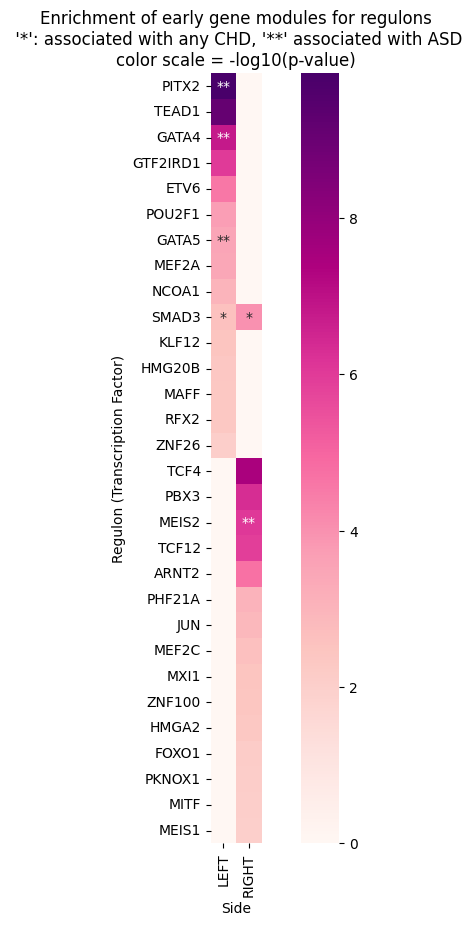

In [78]:
# Transforming p-values to -log10(p)
results_concat['-log10(pval)'] = -np.log10(results_concat['pval'])

# Create a pivot table for the heatmap
heatmap_data = results_concat.pivot("TF", "side", "-log10(pval)")
heatmap_data = heatmap_data.fillna(value=0)
heatmap_data = heatmap_data.sort_values(by=["LEFT","RIGHT"], ascending=False)

# Initialize with empty strings
annotations = pd.DataFrame('', index=heatmap_data.index, columns=heatmap_data.columns)

# Loop through the original dataframe to populate the annotations
for _, row in results_concat.iterrows():
    tf = row['TF']
    side = row['side']
    chd_classification = row['CHD classification']
    if pd.notna(chd_classification):
        if "ASD" in chd_classification:
            annotations.loc[tf, side] = '**'  # Two asterisks if "ASD" in CHD classification
        else:
            annotations.loc[tf, side] = '*'   # One asterisk otherwise

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=annotations, fmt="s", cmap="RdPu", square=True, cbar=True)
plt.title("Enrichment of early gene modules for regulons\n '*': associated with any CHD, '**' associated with ASD\ncolor scale = -log10(p-value)")
plt.xlabel("Side")
plt.ylabel("Regulon (Transcription Factor)")
plt.savefig("CHD_enrichment.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [94]:
[reg for reg in list(TF_TG_dict.keys()) if "PITX" in reg]

['PITX2_+_(130g)']

GO_Biological_Process_2023


Gene_set  \
0   GO_Biological_Process_2023   
1   GO_Biological_Process_2023   
15  GO_Biological_Process_2023   
31  GO_Biological_Process_2023   
7   GO_Biological_Process_2023   
10  GO_Biological_Process_2023   
23  GO_Biological_Process_2023   
17  GO_Biological_Process_2023   
16  GO_Biological_Process_2023   
12  GO_Biological_Process_2023   
36  GO_Biological_Process_2023   
4   GO_Biological_Process_2023   
2   GO_Biological_Process_2023   
3   GO_Biological_Process_2023   
5   GO_Biological_Process_2023   
11  GO_Biological_Process_2023   
33  GO_Biological_Process_2023   
32  GO_Biological_Process_2023   
29  GO_Biological_Process_2023   
49  GO_Biological_Process_2023   
50  GO_Biological_Process_2023   
9   GO_Biological_Process_2023   
18  GO_Biological_Process_2023   
22  GO_Biological_Process_2023   
54  GO_Biological_Process_2023   
20  GO_Biological_Process_2023   
19  GO_Biological_Process_2023   
8   GO_Biological_Process_2023   
14  GO_Biological_Process_2023   
46  GO_Biological_Process_2023   

                                                 Term Overlap       P-value  \
0            Striated Muscle Contraction (GO:0006941)    8/57  3.242501e-09   
1                      Heart Contraction (GO:0060047)    7/41  7.791294e-09   
15                     Heart Development (GO:0007507)   7/171  1.291293e-04   
31                   Metal Ion Transport (GO:0030001)   6/171  8.902454e-04   
7                   Cellular Respiration (GO:0045333)    6/85  1.929381e-05   
10  Proton Motive Force-Driven ATP Synthesis (GO:0...    5/60  4.404370e-05   
23  Positive Regulation Of Stress-Activated MAPK C...   5/105  6.168816e-04   
17           Embryonic Organ Development (GO:0048568)    5/77  1.458901e-04   
16     Actomyosin Structure Organization (GO:0031032)    5/77  1.458901e-04   
12  Mitochondrial ATP Synthesis Coupled Electron T...    5/70  9.266914e-05   
36  Regulation Of Anatomical Structure Morphogenes...   5/127  1.450033e-03   
4             Cardiac Muscle Contraction (GO:0060048)    5/33  2.202365e-06   
2                 Sarcomere Organization (GO:0045214)    5/29  1.125181e-06   
3    Cardiac Muscle Tissue Morphogenesis (GO:0055008)    5/31  1.593196e-06   
5                     Myofibril Assembly (GO:0030239)    5/46  1.188816e-05   
11  Ventricular Cardiac Muscle Tissue Morphogenesi...    4/33  6.025266e-05   
33       Regulation Of Heart Contraction (GO:0008016)    4/69  1.062798e-03   
32      Aerobic Electron Transport Chain (GO:0019646)    4/68  1.006200e-03   
29             Oxidative Phosphorylation (GO:0006119)    4/63  7.545896e-04   
49  Mitochondrial Respiratory Chain Complex Assemb...    4/90  2.829063e-03   
50                    Muscle Contraction (GO:0006936)    4/94  3.309856e-03   
9   Regulation Of Striated Muscle Contraction (GO:...    4/29  3.568283e-05   
18       Cardiac Ventricle Morphogenesis (GO:0003208)    4/42  1.575255e-04   
22                   Aerobic Respiration (GO:0009060)    4/59  5.882079e-04   
54                      Axon Development (GO:0061564)    4/99  3.985511e-03   
20  Proton Motive Force-Driven Mitochondrial ATP S...    4/53  3.899914e-04   
19     Cardiac Muscle Tissue Development (GO:0048738)    4/52  3.623692e-04   
8   Ventricular Cardiac Muscle Tissue Development ...    4/25  1.939146e-05   
14                         Odontogenesis (GO:0042476)    4/39  1.175135e-04   
46             Stem Cell Differentiation (GO:0048863)    3/41  2.388284e-03   

    Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0           0.000004            0                     0   26.525259   
1           0.000004            0                     0   33.202296   
15          0.008999            0                     0    6.838291   
31          0.031019            0                     0    5.778592   
7           0.002402            0                     0   12.121886   
10          0.004464            0                     0   14.410909   
23          0.024903

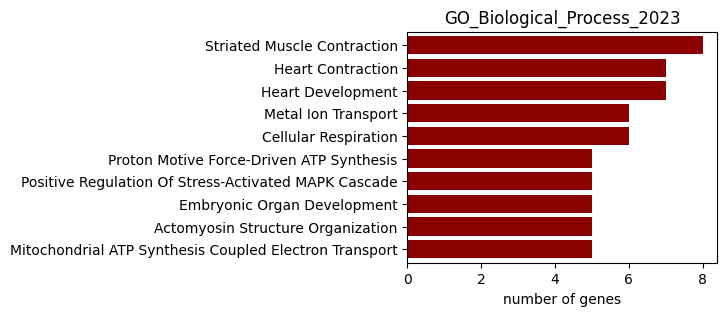

In [97]:
plot.GO_plot(gene_list=TF_TG_dict["PITX2_+_(130g)"],display_table=True,gene_sets=['GO_Biological_Process_2023'])

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


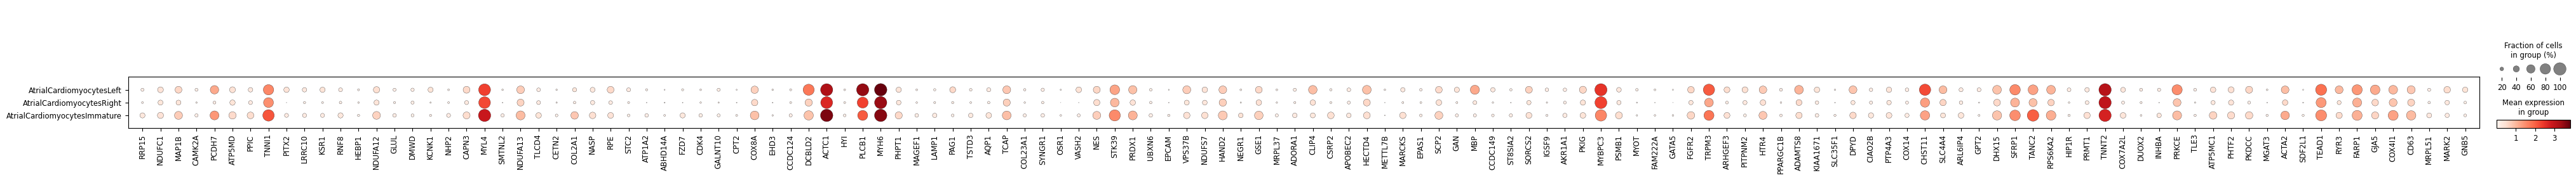

In [98]:
sc.pl.dotplot(adata_gex, groupby="AtrialCardiomyocytesImmature_annotation",var_names=TF_TG_dict["PITX2_+_(130g)"])